# SC4002 Natural Language Processing Group 30 Assignment

# Q 1, 2, 3.1, 3.2
### This notebook covers Questions 1, 2, 3.1 and 3.2 of the assignment

## Part 0. Dataset Preparation

### Installing Required Libraries

First, we will install the required libraries for dataset preparation. These include:
- **datasets**: Used to load the Rotten Tomatoes review dataset.
- **NLTK**: The Natural Language Toolkit (NLTK), used for tokenization.
- **Counter**: Used to count the occurrences of elements, such as tokens in our text or labels in our dataset.
- **pandas**: Used for data manipulation and analysis.
- **numpy**: Used for performing computations on arrays and matrices.
- **gensim**: Used for getting pretrained Word2Vec model to generate word embeddings.
- **string**: Used identify punctuation in tokens.

In [1]:
! pip install datasets
! pip install nltk
! pip install gensim
! pip install huggingface-hub
! pip install torchsummary
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download("popular")
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import gensim.downloader as api
import numpy as np
from string import punctuation

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    | 

### Loading Rotten Tomatoes Dataset

Here, we load the Rotten Tomatoes movie review dataset from the `datasets` library. This dataset contains movie reviews labeled with sentiments (1 for positive and 0 for negative), which we will use for sentiment analysis.

The dataset is divided into three parts:
- **Training Dataset**: Used to train the model.
- **Validation Dataset**: Used to tune the hyperparameters and evaluate the model during training.
- **Test Dataset**: Used to evaluate the model's performance on unseen data after training.


In [2]:
from datasets import load_dataset
# load train, val and test datasets from rotten tomatoes dataset
dataset = load_dataset ("rotten_tomatoes")
train_dataset = dataset ['train']
validation_dataset = dataset ['validation']
test_dataset = dataset ['test']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

train.parquet:   0%|          | 0.00/699k [00:00<?, ?B/s]

validation.parquet:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

test.parquet:   0%|          | 0.00/92.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

### Exploratory Data Analysis

We will perform exploratory data analysis on the Rotten Tomatoes training dataset. EDA helps us understand the dataset's structure and the characteristics of the data we will be working with.

We will start by checking the number of training samples, the number of positive and negative labels, and then look at the content of the first sample from the training dataset.

As we can see below, there are 8530 reviews in the training dataset, evenly split between positive and negative sentiments. This balance is important for developing an effective sentiment analysis model as an unbalanced dataset may lead the model to be more biased towards a particular label. The reviews appear to have undergone some cleaning, as they are presented in lowercase, and punctuation is separated by spaces. This preprocessing step helps facilitate tokenization.

In [3]:
# check number of training samples
print(f"Number of training samples: {len(train_dataset)}")

Number of training samples: 8530


In [4]:
# count the occurrences of each label using Counter
label_counts = Counter(train_dataset['label'])

pd.DataFrame(label_counts.items(), columns=['Label', 'Count'])

Label  Count
0      1   4265
1      0   4265

In [5]:
# first sample from the dataset
print(train_dataset[0])

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .', 'label': 1}


## Part 1. Preparing Word Embeddings

Word embeddings are dense vector representations of words in a continuous vector space, where semantically similar words are represented by vectors that are close to each other. They capture the meanings of words based on their context in large corpora, enabling better performance on various NLP tasks such as sentiment analysis, translation, and more.

Interestingly, words that are similar to each other will be closer to each other in vector space, and words that share related concepts often exhibit the same difference in their vector representations. For example, the difference between "king" and "queen" vector representations and the difference between "girl" and "boy" vector representations tends to be a similar difference vector, which shows that word embeddings can capture concepts like gender relationships.

Word2Vec is a specific neural network based algorithm developed by Google in 2013, and is one of the most popular methods for generating word embeddings. They are obtained using either Skip Gram (predicts a word based on its surrounding words) and Common Bag Of Words (predicts surrounding words based on a given word).

### Tokenizing the data using NLTK Word Tokenizer

Tokenization is the process of splitting a string of text into individual words or tokens. This step is important in natural language processing as it allows us to break down text into individual pieces, making it easier to analyze and understand.

To tokenize our dataset, we used the NLTK Word Tokenizer. NLTK provides a robust way to perform tokenization, including handling punctuation and special characters effectively.

From the example below, we can see that the tokenizer has successfully split the sample review into individual tokens. Punctuation marks, such as commas and periods, are retained as separate tokens. We can also see that the token "'s" is correctly identified and separated from the preceding word, which is essential for understanding contractions in text.

From counting the number of unique tokens, we can see that the length of vocabulary for the training set is 18010.

In [6]:
# tokenize a text
tokens = word_tokenize(train_dataset[0]["text"])

print(tokens)

['the', 'rock', 'is', 'destined', 'to', 'be', 'the', '21st', 'century', "'s", 'new', '``', 'conan', '``', 'and', 'that', 'he', "'s", 'going', 'to', 'make', 'a', 'splash', 'even', 'greater', 'than', 'arnold', 'schwarzenegger', ',', 'jean-claud', 'van', 'damme', 'or', 'steven', 'segal', '.']


In [7]:
# tokenize entire train dataset
tokenized_texts = [word_tokenize(text) for text in train_dataset['text']]

vocab = set()

# Iterate over the tokenized texts to populate the vocabulary set
for tokens in tokenized_texts:
    vocab.update(tokens)

# Get the size of the vocabulary
vocab_size = len(vocab)
print(f"Length of vocabulary in train dataset: {vocab_size}")

Length of vocabulary in train dataset: 18030


### Generating word embeddings using pre-trained Word2Vec Model with FastText

We use the Gensim library to download and use the pre-trained Google News Word2Vec model, which has been trained on a large corpus of news articles.

By viewing the embedding size, we can see that a word embedding generated by this model will be a 300-dimensional vector, and has a vocabulary of size 3000000.

Then, we generate word embeddings to represent each word in the tokenized train dataset.

In [8]:
# load a pre-trained Word2Vec model (e.g. "word2vec-google-news-300") from gensim's api
w2vmodel = api.load("fasttext-wiki-news-subwords-300")

[==================================================] 100.0% 958.5/958.4MB downloaded


In [9]:
#check embedding size
print(f"Embedding size: {w2vmodel.vector_size}")

Embedding size: 300


In [10]:
#check vocabulary size
print(f"Vocab size: {len(w2vmodel.key_to_index)}")

Vocab size: 999999


In [11]:
# generate word embeddings for each token in the tokenized train dataset
all_train_words = [word for sublist in tokenized_texts for word in sublist]

### Analysing OOV issue with Pre-trained Word2Vec Model

Out-Of-Vocabulary (OOV) words are words that the model has not encountered during its training phase, meaning they do not exist in the model's vocabulary. This can include rare words, newly coined terms, slang, domain-specific jargon, or words with inconsistent formatting or symbols.

We counted that there are 3600 unique OOV words in the train dataset that are not in the Word2Vec dictionary.

If we observe these OOV words, we see that the majority of them are hyphenated words. If the model can recognise the individual parts but not the hyphenated version, it may not recognize the entire term as valid.

Additionally, some of them are stopwords, which are commonly used words in a language that are often filtered out during NLP tasks because they carry less meaningful information, such as numbers and punctuation.


In [12]:
oov_words = [word for word in all_train_words if word not in w2vmodel.key_to_index]
oov_counts = Counter(oov_words)
print(f"Number of OOV words in train data not in Word2Vec vocab: {len(oov_counts)}")

Number of OOV words in train data not in Word2Vec vocab: 1961


In [13]:
oov_counts

Counter({'``': 507,
         'jean-claud': 1,
         'damme': 2,
         'co-writer/director': 2,
         'too-tepid': 1,
         "n't": 741,
         'wisegirls': 1,
         "'who": 3,
         'r-rated': 2,
         'cantet': 2,
         'fulford-wierzbicki': 2,
         "'compleja": 1,
         'intelectualmente': 1,
         'retadora': 1,
         'orquídeas': 1,
         'originalidad': 1,
         'karmen': 1,
         "'50": 1,
         'nettelbeck': 5,
         'parka-wrapped': 1,
         'singer/composer': 1,
         'morvern': 6,
         'callar': 3,
         'treebeard': 1,
         "'performance": 1,
         'haneke': 9,
         'comedy/thriller': 1,
         'meeropol': 1,
         "early-'80s": 1,
         'mcfarlane': 1,
         'hemmingway': 1,
         'lovers-on-the-run': 1,
         'piesiewicz': 1,
         'kieslowski': 2,
         'veronique': 1,
         'again-courage': 1,
         'sl2': 1,
         'pabst': 1,
         'earnhart': 3,
         'sus

### Addressing Out-of-Vocabulary (OOV) issue of Word2Vec Model

The presence of out-of-vocabulary (OOV) words is a well-known limitation of Word2Vec since it creates a fixed vocabulary during the training phase. The model learns to represent only the words present in the training dataset. Any word not encountered during this training phase will be treated as OOV, meaning it has no vector representation (represented as 0).

1. **Removing punctuation and stopwords**: Punctuation and stopwords are not as meaningful and so can be filtered out of the train dataset without overly impacting the quality of NLP analysis. This is corroborated by the fact that the pretrained Word2Vec model does not use them in its vocabulary.

2. **Using Subword Embeddings**: We will generate all possible subwords of a word, and average the vector representations of the subwords that exist in the model's vocabulary. This allows the model to generate representations for OOV words by combining the embeddings of their constituent subwords.

Here, we import a list of common stopwords from the NLTK corpus, and the string library for identifying punctuation. We tokenize the training set again but filter out any detected stopwords or punctuation. The result is the training set's vocabulary will now be reduced slightly from 18000 to 17879, but the result is that we have been able to remove some of the OOV words in the train dataset.

In [14]:
# remove punctuation and stopwords
import string
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def tokenize_and_remove_punctuation_and_stopwords(text):
    tokens = word_tokenize(text)  # Tokenize the text
    tokens_no_punctuation_or_stopwords = [token for token in tokens if token not in string.punctuation and token not in stop_words]  # Remove punctuation
    return tokens_no_punctuation_or_stopwords

new_tokenized_texts = [tokenize_and_remove_punctuation_and_stopwords(text) for text in train_dataset['text']]

In [15]:
new_vocab = set()

# Iterate over the tokenized texts to populate the vocabulary set
for tokens in new_tokenized_texts:
    new_vocab.update(tokens)

# Get the size of the vocabulary
new_vocab_size = len(new_vocab)
print(f"Updated length of vocabulary in train dataset: {new_vocab_size}")

Updated length of vocabulary in train dataset: 17879


In [16]:
all_train_words_wo_punc_or_stopwords = [word for sublist in new_tokenized_texts for word in sublist]
new_oov_words = [word for word in all_train_words_wo_punc_or_stopwords if word not in w2vmodel.key_to_index]
new_oov_counts = Counter(new_oov_words)
print(f"Number of OOV words in train data not in Word2Vec vocab: {len(new_oov_counts)}")

Number of OOV words in train data not in Word2Vec vocab: 1960


In [17]:
new_oov_counts

Counter({'``': 507,
         'jean-claud': 1,
         'damme': 2,
         'co-writer/director': 2,
         'too-tepid': 1,
         "n't": 741,
         'wisegirls': 1,
         "'who": 3,
         'r-rated': 2,
         'cantet': 2,
         'fulford-wierzbicki': 2,
         "'compleja": 1,
         'intelectualmente': 1,
         'retadora': 1,
         'orquídeas': 1,
         'originalidad': 1,
         'karmen': 1,
         "'50": 1,
         'nettelbeck': 5,
         'parka-wrapped': 1,
         'singer/composer': 1,
         'morvern': 6,
         'callar': 3,
         'treebeard': 1,
         "'performance": 1,
         'haneke': 9,
         'comedy/thriller': 1,
         'meeropol': 1,
         "early-'80s": 1,
         'mcfarlane': 1,
         'hemmingway': 1,
         'lovers-on-the-run': 1,
         'piesiewicz': 1,
         'kieslowski': 2,
         'veronique': 1,
         'again-courage': 1,
         'sl2': 1,
         'pabst': 1,
         'earnhart': 3,
         'sus

Next, we will use the averages of subword embeddings of a word to calculate its word embedding if the word does not exist in the model's vocabulary. Even if the model does not recognise the word, it can still attempt to approximate it via its recognised subwords. This can be seen to be particularly effective in decreasing the OOV occurences for hyphenated words.

We can see that this strategy was extremely effective and reduced the number of OOV words to **1**. This OOV word seems to combination of punctuations, which would not be easily picked up by the NLTK or string library. While this OOV words could also be manually filtered out as they appear to have little meaningful data, we decided to keep them in as it more accurately reflects real-world conditions where the model may not recognise all tokens.

In [18]:
# get all possible subwords of a word
def get_subwords(word):
    return [word[i:i+n] for n in range(1, len(word) + 1) for i in range(len(word) - n + 1)]

# encoding an OOV word using subword embedding
def encode_with_subwords(word, word2vec_model):
    # return word embedding of the word if it exists
    if word in word2vec_model.key_to_index:
        return word2vec_model[word]

    # if the word does not exist, attempt to recognise subwords of the word
    else:
        subwords = get_subwords(word)
        vectors = [word2vec_model[subword] for subword in subwords if subword in word2vec_model.key_to_index]
        if vectors:
            return np.mean(vectors, axis=0)  # average the vectors of subwords and return it
        else:
            return np.zeros(word2vec_model.vector_size)  # return a zero vector if no subwords found (OOV)

# detect if a word or subword embedding of the word exists in word2vec
def exists_subword_embedding(word, word2vec_model):
    # return word embedding of the word if it exists
    if word in word2vec_model.key_to_index:
        return True

    # if the word does not exist, attempt to recognise subwords of the word
    else:
        subwords = get_subwords(word)
        vectors = [word2vec_model[subword] for subword in subwords if subword in word2vec_model.key_to_index]
        if vectors:
            return True
        else:
            return False

In [19]:
oov_words_latest = [word for word in all_train_words_wo_punc_or_stopwords if not exists_subword_embedding(word, w2vmodel)]
oov_counts_latest = Counter(oov_words_latest)
print(f"Number of OOV words in train data not in Word2Vec vocab: {len(oov_counts_latest)}")

Number of OOV words in train data not in Word2Vec vocab: 1


In [20]:
oov_counts_latest

Counter({'``': 507})

###Generating Word Embedding Matrix

Lastly, we use the Word2Vec model alongside the updated tokenization algorithm with subword handling algorithm to generate an matrix of word embeddings for any piece of input text.

The number of rows of this matrix would be the number of tokens (filtering out punctuation and stopwords), while the column size would be the vector size of the Word2Vec model output, which is 300. Thus, each row in the matrix corresponds to one word embedding vector.

In [21]:
def generate_embedding_matrix(text, word2vec_model):
    tokenized_text = tokenize_and_remove_punctuation_and_stopwords(text)
    return np.array([encode_with_subwords(word, w2vmodel) for word in tokenized_text])

embedding_matrix = generate_embedding_matrix(train_dataset[0]['text'], w2vmodel)
embedding_matrix.shape

(22, 300)

## Quesion 2

# Sentiment Dataset

This code snippet defines a custom `SentimentDataset` class in PyTorch for sequence-based sentiment analysis. The dataset class is designed to handle textual data represented as sequences of word indices, enabling the model to process tokenized and indexed text inputs.



- **`__init__`**: Initializes the dataset with a list of word index sequences (`indices`) and corresponding sentiment labels (`labels`).
- **`__len__`**: Returns the total number of samples in the dataset, defined by the length of the `labels` list.
- **`__getitem__`**: Retrieves a sample from the dataset, converting both the sequence of word indices and its associated label into PyTorch tensors.




In [55]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torch.nn as nn
import torch.optim as optim
from nltk.tokenize import word_tokenize
from torch.nn.utils.rnn import pad_sequence

class SentimentDataset(Dataset):
    def __init__(self, indices, labels):
        self.indices = indices  # List of lists where each sublist is a sequence of word indices
        self.labels = labels     # List of labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        # Convert each sequence of indices and the label to tensors
        text_tensor = torch.tensor(self.indices[idx], dtype=torch.long)
        label_tensor = torch.tensor(self.labels[idx], dtype=torch.long)
        return text_tensor, label_tensor


# Data Loading and Preparation for Model

This section provides functions for preparing and loading data for sentiment analysis. It includes functions to handle tokenization, indexing, and batching of text data. The code facilitates efficient processing of text sequences for model training and evaluation.

### `collate_fn(batch)`
This custom collate function:
- **Batch Padding**: Pads each batch of text sequences to the length of the longest sequence, ensuring that variable-length sequences can be processed in a single batch.
- **Label Stacking**: Stacks the labels of each sample in the batch into a tensor.

### `create_data_loaders(dataset, batch_size)`
This function generates `DataLoader` objects for training, validation, and test sets.
- **Text Tokenization**: Tokenizes each sentence in the dataset using the `word_tokenize` function from `nltk`.
- **Word Index Mapping**: Maps each word in the tokenized text to an index from a pre-trained `word2vec` model.
- **Index Conversion**: Converts tokenized sentences to sequences of word indices.
- **Dataset Creation**: Initializes `SentimentDataset` objects for training, validation, and test splits.
- **Data Loaders**: Creates `DataLoader` objects for each split, utilizing the `collate_fn` for batching and padding.

The resulting data loaders are used to efficiently feed data into the model in batches, allowing for faster and organized training and evaluation.


In [56]:
from nltk.tokenize import word_tokenize
import math
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
import seaborn as sns

def collate_fn(batch):
    # Separate the batch into texts and labels
    texts, labels = zip(*batch)
    # Pad texts to the length of the longest sequence in the batch
    texts_padded = pad_sequence(texts, batch_first=True, padding_value=0)
    # Stack labels into a tensor
    labels = torch.stack(labels)
    return texts_padded, labels

def create_data_loaders(dataset, batch_size):
    # Tokenize text data for each split (train, validation, test)
    train_texts = [word_tokenize(text) for text in dataset['train']['text']]
    validation_texts = [word_tokenize(text) for text in dataset['validation']['text']]
    test_texts = [word_tokenize(text) for text in dataset['test']['text']]

    # Map each word in the word2vec model to an index
    word_to_index = {word: idx for idx, word in enumerate(w2vmodel.index_to_key)}

    # Convert tokenized texts to indices based on the word2vec model
    train_indices = [[word_to_index[word] for word in tokens if word in word_to_index] for tokens in train_texts]
    validation_indices = [[word_to_index[word] for word in tokens if word in word_to_index] for tokens in validation_texts]
    test_indices = [[word_to_index[word] for word in tokens if word in word_to_index] for tokens in test_texts]

    # Create dataset objects for each split
    train_dataset = SentimentDataset(train_indices, dataset['train']['label'])
    validation_dataset = SentimentDataset(validation_indices, dataset['validation']['label'])
    test_dataset = SentimentDataset(test_indices, dataset['test']['label'])

    # Create data loaders for each split with specified batch size and custom collate function
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    validation_loader = DataLoader(validation_dataset, batch_size=batch_size, collate_fn=collate_fn)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_fn)

    return train_loader, validation_loader, test_loader

### Training and Evaluation Loop
The purpose of this cell is to define essential functions for training, evaluating, and visualizing the performance of the model. This includes implementing early stopping, tracking metrics, evaluating model performance on test data, and plotting the training and validation loss and accuracy curves.

Main Components-:

#### EarlyStopper Class
- This class monitors the validation accuracy during training and stops the process if the performance does not improve for a specified number of epochs (`patience`).
- **Attributes**:
  - `patience`: Number of epochs to wait for an improvement in validation accuracy before stopping.
  - `verbose`: If set to `True`, prints early stopping messages.
- **Methods**:
  - `early_stop`: Checks if the validation accuracy has improved. If not, increments a counter. Once the counter reaches the patience limit, training stops early.

#### `train_model` Function
- Trains the model using the specified `epochs`, `criterion`, and `optimizer`.
- **Arguments**:
  - `model`: The model to train.
  - `epochs`: Number of epochs.
  - `criterion`: Loss function.
  - `optimizer`: Optimization algorithm.
  - `train_loader`, `validation_loader`: Data loaders for training and validation.
  - `handle_oov`: If `True`, processes out-of-vocabulary handling; otherwise, uses basic input processing.
  - `earlystopper`: Instance of `EarlyStopper` to manage early stopping based on validation accuracy.
- **Training and Validation**:
  - Loops through each epoch, training the model on `train_loader` and evaluating on `validation_loader`.
  - Records and prints training loss, training accuracy, validation loss, and validation accuracy for each epoch.
  - Saves the model if validation accuracy improves and stops early if it stagnates based on the early stopper.
- **Returns**: Lists of training and validation loss and accuracy history, as well as the best model achieved during training.

#### `evaluate_model` Function
- Evaluates the trained model on the test dataset.
- **Arguments**:
  - `model`: The trained model to evaluate.
  - `test_loader`: Data loader for the test dataset.
  - `handle_oov`: Option to handle out-of-vocabulary tokens.
- **Evaluation Metrics**:
  - Calculates test accuracy, confusion matrix, precision, F1 score, and displays these metrics.
  - Plots the confusion matrix to visualize the model's performance on positive and negative samples.

#### `plot_loss` Function
- Plots the training and validation loss and accuracy over epochs, providing insights into model convergence and potential overfitting.
- **Arguments**:
  - `train_loss`, `val_loss`: Lists of training and validation loss values over epochs.
  - `train_accuracy`, `val_accuracy_history`: Lists of training and validation accuracy values over epochs.
  - `title`: Optional title for the plots.
- **Plotting**:
  - Uses subplots to display loss and accuracy on two separate charts.
  

These functions collectively enable efficient training, monitoring, evaluation, and visualization, which are essential steps for model development and debugging.


In [24]:
# Class for early stopping to prevent overfitting when validation accuracy does not improve
class EarlyStopper:
    def __init__(self, patience=5, verbose=True):
        self.patience = patience  # Number of epochs to wait for improvement
        self.counter = 0  # Tracks consecutive epochs with no improvement
        self.best_acc = 0  # Best validation accuracy observed so far
        self.verbose = verbose  # If True, print early stopping messages

    def early_stop(self, val_acc, model):
        if val_acc > self.best_acc:
            self.best_acc = val_acc  # Update best accuracy
            self.counter = 0  # Reset counter if validation accuracy improves
        else:
            self.counter += 1  # Increment counter if no improvement

        if self.counter >= self.patience:
            if self.verbose:
                print("Early stopping...")  # Print message if stopping
            return True
        return False

# Function to train the model with early stopping and optional OOV handling
def train_model(model, epochs, criterion, optimizer, train_loader, validation_loader, handle_oov=False, earlystopper=EarlyStopper(patience=5, verbose=True)):
    train_loss_history = []  # Track training loss per epoch
    train_accuracy_history = []  # Track training accuracy per epoch
    val_loss_history = []  # Track validation loss per epoch
    val_accuracy_history = []  # Track validation accuracy per epoch
    best_model = model.state_dict()  # Store best model based on validation accuracy
    best_val_accuracy = 0.0  # Initialize best validation accuracy

    for epoch in range(epochs):
        model.train()  # Set model to training mode
        total_loss = 0
        correct = 0
        total = 0

        # Training loop
        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs}', unit='batch'):
            if isinstance(labels, list):
                labels = torch.tensor(labels)
            # if isinstance(inputs, list):
            #     inputs =torch.tensor(inputs)
            if handle_oov:
                labels = labels.to(device)
            else:
                inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()  # Reset gradients
            outputs = model(inputs)  # Forward pass
            _, predicted = torch.max(outputs, 1)  # Get predicted labels
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  # Count correct predictions
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update model parameters

            total_loss += loss.item()

        train_loss = total_loss / len(train_loader)  # Compute average training loss
        train_accuracy = correct / total  # Compute training accuracy
        train_loss_history.append(train_loss)
        train_accuracy_history.append(train_accuracy)

        # Validation loop
        model.eval()  # Set model to evaluation mode
        total_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in validation_loader:
                if isinstance(labels, list):
                    labels = torch.tensor(labels)
                # if isinstance(inputs, list):
                #     inputs =torch.tensor(inputs)
                if handle_oov:
                    labels = labels.to(device)
                else:
                    inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                loss = criterion(outputs, labels)
                total_loss += loss.item()

        val_loss = total_loss / len(validation_loader)  # Compute average validation loss
        val_accuracy = correct / total  # Compute validation accuracy
        val_loss_history.append(val_loss)
        val_accuracy_history.append(val_accuracy)

        print(f"Epoch {epoch + 1}/{epochs} | Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.4f} | "
              f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_accuracy:.4f}")
        print("-" * 60)

        # Early stopping based on validation accuracy
        if earlystopper.early_stop(val_accuracy, model):
            break

        # Save the best model
        if val_accuracy >= best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model = copy.deepcopy(model)

    model = copy.deepcopy(best_model)  # Restore best model

    return train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history, model

# Function to evaluate the model on the test set with optional OOV handling
def evaluate_model(model, test_loader, handle_oov=False):
    model.eval()  # Set model to evaluation mode
    correct, total = 0, 0
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            if isinstance(labels, list):
                labels = torch.tensor(labels)
            # if isinstance(inputs, list):
            #     inputs =torch.tensor(inputs)
            if handle_oov:
                labels = labels.to(device)
            else:
                inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    accuracy = correct / total  # Overall accuracy
    print(f'Test Accuracy: {accuracy:.2f}')

    # Plot confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate and print additional metrics
    TN, FP, FN, TP = cm.ravel()
    precision = precision_score(all_labels, all_predictions, average='binary')
    f1 = f1_score(all_labels, all_predictions, average='binary')

    print(f'True Positives (TP): {TP}')
    print(f'True Negatives (TN): {TN}')
    print(f'False Positives (FP): {FP}')
    print(f'False Negatives (FN): {FN}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'F1 Score: {f1:.2f}')

    return accuracy

# Function to plot training and validation loss and accuracy over epochs
def plot_loss(train_loss, train_accuracy, val_loss, val_accuracy_history, title='Training Curves'):
    epochs = np.arange(1, len(train_loss) + 1)  # List of epoch numbers

    plt.figure(figsize=(12, 6))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Training Loss', color='blue', linewidth=2)
    plt.plot(epochs, val_loss, label='Validation Loss', color='orange', linewidth=2)
    plt.title(f"{title} - Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.xticks(ticks=np.arange(1, len(train_loss) + 1, step=max(1, len(epochs) // 10)))
    plt.legend()
    plt.grid(True)

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue', linewidth=2)
    plt.plot(epochs, val_accuracy_history, label='Validation Accuracy', color='orange', linewidth=2)
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.xticks(ticks=np.arange(1, len(train_loss) + 1, step=max(1, len(epochs) // 10)))
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


### Hyperparameter Tuning
The purpose of this cell is to implement a **random search** strategy for hyperparameter tuning of various model architectures (e.g., BiLSTM, BiGRU, RNNNonOOV, RNNOOV). By randomly sampling from a given hyperparameter grid, this function aims to identify the best-performing model configuration in terms of validation accuracy, while also incorporating early stopping to prevent overfitting.

Main Components-:

#### `random_search` Function
- **Arguments**:
  - `param_grid`: A dictionary specifying ranges for each hyperparameter to be sampled. Keys include `'hidden_size'`, `'learning_rate'`, `'batch_size'`, `'num_epochs'`, `'dropout'`, and `'num_layers'`.
  - `model_type`: Specifies the architecture type to be used (e.g., "BiLSTM", "BiGRU", etc.).
  - `num_samples`: Number of random hyperparameter combinations to evaluate.
  - `train_embeddings_bool`: Controls whether to fine-tune embeddings during training.
  - `handle_oov`: Flag for handling out-of-vocabulary (OOV) words.

- **Initialization**:
  - `best_val_accuracy_hist` is set to negative infinity to keep track of the highest validation accuracy encountered.
  - `best_params`, `best_train_history`, and `best_val_history` are initialized to store details of the best-performing model.

- **Generating Hyperparameter Combinations**:
  - `all_combinations` uses `itertools.product` to generate all possible combinations from `param_grid`.
  - `random_combinations` randomly samples `num_samples` combinations from `all_combinations`.

- **Model Training for Each Combination**:
  - For each sampled combination of hyperparameters, the model is initialized and trained using `train_model`.
  - **Early stopping** is applied via an `EarlyStopper` instance to terminate training if validation accuracy does not improve for a specified number of epochs.
  - Training and validation loss and accuracy histories are recorded.

- **Updating Best Model**:
  - After each training cycle, the best model and associated parameters are updated if the current model achieves a higher validation accuracy than previously recorded.

- **Returns**:
  - `best_params`: Hyperparameters that yielded the highest validation accuracy.
  - `best_val_loss`: Minimum validation loss achieved by the best model.
  - `best_train_history`, `best_val_history`: Training and validation loss histories for the best model.
  - `best_val_accuracy_history`, `best_train_accuracy_history`: Validation and training accuracy histories for the best model.
  - `best_model`: A copy of the model with the best validation performance.

This random search function effectively automates the exploration of hyperparameter configurations, applying early stopping to avoid overfitting and ensuring that only the best model (with the highest validation accuracy) is retained.


In [49]:
import math
import random
from itertools import product
import gc
import copy


# Function to perform random search over hyperparameters
def random_search(param_grid, model_type, num_samples=10, train_embeddings_bool=False, handle_oov=False):
    input_dim = 300
    output_size = 2
    best_val_accuracy_hist = -math.inf
    best_params = {}
    best_train_history = []
    best_val_history = []
    best_model = None
    best_val_accuracy_history = []

    # Generate all combinations of hyperparameters
    all_combinations = list(product(
        param_grid['hidden_size'],
        param_grid['learning_rate'],
        param_grid['batch_size'],
        param_grid['num_epochs'],
        param_grid['dropout'],
        param_grid['num_layers'],
    ))

    # Randomly sample combinations from the grid
    random_combinations = random.sample(all_combinations, min(num_samples, len(all_combinations)))

    for hidden_size, learning_rate, batch_size, num_epochs, dropout, num_layers in random_combinations:
        print(f"Testing: hidden_size={hidden_size}, lr={learning_rate}, batch_size={batch_size}, epochs={num_epochs}, dropout={dropout}, num_layers={num_layers}")

        # Clear GPU memory
        if torch.cuda.device_count() >= 1:
            gc.collect()
            torch.cuda.empty_cache()

        # Initialize the model based on the specified model type
        if model_type == "BiLSTM":
            model = BiLSTM(embeddings=w2vmodel.vectors, input_dim=input_dim, hidden_size=hidden_size, output_size=output_size, num_layers=num_layers, dropout=dropout, train_embeddings=train_embeddings_bool)
        elif model_type == "BiGRU":
            model = BiGRU(input_dim=input_dim, hidden_size=hidden_size, output_size=output_size, num_layers=num_layers, dropout=dropout, word2vec_model=w2vmodel, train_embeddings=train_embeddings_bool)
        elif model_type == "RNNNonOOV":
            model = RNNNonOOV(input_dim, hidden_size, output_size, num_layers=num_layers, dropout=dropout,embeddings=w2vmodel.vectors, train_embeddings=train_embeddings_bool)
        elif model_type == "RNNOOV":
            model = RNNOOV(input_dim, hidden_size, output_size,num_layers=num_layers, dropout=dropout, embeddings=w2vmodel.vectors, train_embeddings=train_embeddings_bool)
        elif model_type == "RNNAvgPool":
            model = RNNAveragePooling(input_dim, hidden_size, output_size, num_layers=num_layers, dropout=dropout, embeddings=w2vmodel.vectors, train_embeddings=train_embeddings_bool)
        elif model_type == "RNNConcatPooling":
            model = RNNConcatPooling(input_dim, hidden_size, output_size, num_layers=num_layers, dropout=dropout, embeddings=w2vmodel.vectors, train_embeddings=train_embeddings_bool)
        else:
            raise ValueError(f"Model '{model_type}' not found. Choose from: BiLSTM, BiGRU, RNNNonOOV, RNNOOV")

        criterion = nn.CrossEntropyLoss()
        model.to(device)
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        earlystopper = EarlyStopper(patience=5, verbose=True)

        # Train model with early stopping
        train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history, model = train_model(model, num_epochs, criterion, optimizer, train_loader, validation_loader, handle_oov=handle_oov, earlystopper=earlystopper)
        best_val_accuracy = max(val_accuracy_history)

        # Update best model if current model has better validation accuracy
        if best_val_accuracy > best_val_accuracy_hist:
            best_train_history = train_loss_history
            best_val_history = val_loss_history
            best_val_accuracy_hist = best_val_accuracy
            best_val_accuracy_history = val_accuracy_history
            best_train_accuracy_history = train_accuracy_history
            best_val_loss = min(val_loss_history)
            best_params = {
                'hidden_size': hidden_size,
                'learning_rate': learning_rate,
                'batch_size': batch_size,
                'num_epochs': num_epochs,
                'dropout': dropout,
                'num_layers': num_layers,
            }
            best_model = copy.deepcopy(model)

    return best_params, best_val_loss, best_train_history, best_val_history, best_val_accuracy_history, best_model, best_train_accuracy_history


### Training with a Fixed Set of Hyperparameters
This cell defines the `train_with_fixed_params` function, which trains a specified model architecture with a fixed set of hyperparameters. The purpose of this function is to streamline the model training process by configuring and training a selected model with predefined parameters, leveraging early stopping to avoid overfitting.

Main components-:

#### `train_with_fixed_params` Function
- **Arguments**:
  - `model_type`: Specifies the model architecture to be used (e.g., "BiLSTM", "BiGRU", etc.).
  - `hidden_size`, `learning_rate`, `batch_size`, `num_epochs`, `dropout`, `num_layers`: Fixed hyperparameters used to configure the model and training process.
  - `train_embeddings_bool`: Boolean flag indicating whether embeddings should be fine-tuned.
  - `handle_oov`: Flag for handling out-of-vocabulary (OOV) words in the dataset.

- **Model Selection and Initialization**:
  - Based on the `model_type`, the appropriate model (e.g., `BiLSTM`, `BiGRU`) is initialized with the specified parameters.
  - Models are initialized with embeddings from a pretrained Word2Vec model, with an option to fine-tune these embeddings during training if `train_embeddings_bool` is set to `True`.

- **Optimizer and Loss Function**:
  - `criterion` is defined as cross-entropy loss for classification tasks.
  - `optimizer` is defined as the Adam optimizer with the specified learning rate.

- **Early Stopping**:
  - An instance of the `EarlyStopper` class is created, which will terminate training if validation accuracy does not improve for a certain number of epochs, thus avoiding overfitting.

- **Training Process**:
  - `train_model` is called to train the model for the specified number of epochs with early stopping. This function returns the best model and training histories (loss and accuracy).
  - Throughout the training process, validation and training losses and accuracies are recorded.

- **Result Compilation**:
  - The best validation accuracy, best training accuracy, and lowest validation loss are recorded.
  - The function returns:
    - `best_model`: A copy of the model that achieved the highest validation accuracy.
    - `results`: A dictionary containing training and validation histories (loss and accuracy), along with best metrics.

The `train_with_fixed_params` function automates the model training process for a given set of hyperparameters and model architecture. By incorporating early stopping, it ensures efficient training while mitigating overfitting, making it suitable for evaluating fixed configurations.


In [50]:
import gc
import copy
import torch.optim as optim
import torch.nn as nn

def train_with_fixed_params(model_type, hidden_size, learning_rate, batch_size, num_epochs, dropout, num_layers, train_embeddings_bool=False, handle_oov=False):
    input_dim = 300  # Set input dimension for embedding size
    output_size = 2  # Number of output classes

    # Print chosen hyperparameters
    print(f"Running with fixed parameters: hidden_size={hidden_size}, lr={learning_rate}, "
          f"batch_size={batch_size}, epochs={num_epochs}, dropout={dropout}, num_layers={num_layers}")

    # Free up GPU memory if available
    if torch.cuda.device_count() >= 1:
        gc.collect()
        torch.cuda.empty_cache()

    # Initialize the model based on the specified model type
    if model_type == "BiLSTM":
        model = BiLSTM(embeddings=w2vmodel.vectors, input_dim=input_dim, hidden_size=hidden_size, output_size=output_size, num_layers=num_layers, dropout=dropout, train_embeddings=train_embeddings_bool)
    elif model_type == "BiGRU":
        model = BiGRU(input_dim=input_dim, hidden_size=hidden_size, output_size=output_size, num_layers=num_layers, dropout=dropout, word2vec_model=w2vmodel, train_embeddings=train_embeddings_bool)
    elif model_type == "RNNNonOOV":
        model = RNNNonOOV(input_dim, hidden_size, output_size, num_layers=num_layers, dropout=dropout,embeddings=w2vmodel.vectors, train_embeddings=train_embeddings_bool)
    elif model_type == "RNNOOV":
        model = RNNOOV(input_dim, hidden_size, output_size,num_layers=num_layers, dropout=dropout, embeddings=w2vmodel.vectors, train_embeddings=train_embeddings_bool)
    elif model_type == "RNNAvgPool":
        model = RNNAveragePooling(input_dim, hidden_size, output_size, num_layers=num_layers, dropout=dropout, embeddings=w2vmodel.vectors, train_embeddings=train_embeddings_bool)
    elif model_type == "RNNConcatPooling":
        model = RNNConcatPooling(input_dim, hidden_size, output_size, num_layers=num_layers, dropout=dropout, embeddings=w2vmodel.vectors, train_embeddings=train_embeddings_bool)
    else:
        raise ValueError(f"Model '{model_type}' not found. Choose from: BiLSTM, BiGRU, RNNNonOOV, RNNOOV")

    criterion = nn.CrossEntropyLoss()  # Define the loss function
    model.to(device)  # Move model to the device
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Set up optimizer
    earlystopper = EarlyStopper()  # Initialize early stopping

    # Train the model and capture training/validation histories
    train_loss_history, train_accuracy_history, val_loss_history, val_accuracy_history, best_model = train_model(
        model, num_epochs, criterion, optimizer, train_loader, validation_loader, handle_oov=handle_oov, earlystopper=earlystopper
    )

    # Capture best validation accuracy, training accuracy, and lowest validation loss
    best_val_accuracy = max(val_accuracy_history)
    best_train_accuracy = max(train_accuracy_history)
    best_val_loss = min(val_loss_history)

    # Compile results
    results = {
        'train_loss_history': train_loss_history,
        'train_accuracy_history': train_accuracy_history,
        'val_loss_history': val_loss_history,
        'val_accuracy_history': val_accuracy_history,
        'best_val_accuracy': best_val_accuracy,
        'best_train_accuracy': best_train_accuracy,
        'best_val_loss': best_val_loss,
    }

    return best_model, results  # Return the best model and results



In [57]:
# Initialize data loaders for training, validation, and testing datasets with a batch size of 64
train_loader, validation_loader, test_loader = create_data_loaders(dataset, 64)

### Strategy 1: RNNAveragePooling

This approach applies average pooling across all time steps of the RNN output to derive a fixed-size vector that represents the entire sentence. The average-pooled vector captures the aggregate information of all words, which is then passed through a fully connected layer for classification.

#### Model Structure
- **Embedding Layer**: Utilizes pretrained embeddings that can be set as trainable or frozen, based on the `train_embeddings` parameter.
- **RNN Layer**: A multi-layer RNN with configurable hidden size, number of layers, and dropout, designed to process sequential data with temporal dependencies.
- **Average Pooling**: Applies average pooling across the RNN's outputs at each time step to capture the sequence’s overall feature representation.
- **Fully Connected Layer**: Maps the pooled RNN output to the desired output size for final prediction.

#### Operational Mechanism
1. **Embedding Transformation**: The input indices are converted into dense vector representations using pretrained embeddings.
2. **RNN Processing**: The embeddings are passed through the RNN, which processes the sequence step-by-step, capturing dependencies through the hidden states.
3. **Average Pooling**: An average is computed across all time steps of the RNN output, creating a fixed-size vector that represents the entire sequence.
4. **Prediction**: The pooled output is passed through a fully connected layer to produce the final prediction.

#### Design Rationale
- **Embedding Flexibility**: Allows using pretrained embeddings, which can significantly enhance performance by leveraging prior knowledge of word representations.
- **Average Pooling**: Reduces the RNN’s sequential output to a single vector, providing a simplified representation that is less computationally intensive than using the final hidden state alone.
- **Configurable RNN**: Enables tuning of hyperparameters like hidden size, number of layers, and dropout to balance model complexity and generalization.
- **Simplicity and Efficiency**: The architecture is designed to be lightweight, making it suitable for tasks that require a balance between efficiency and capturing sequential dependencies.


In [32]:
import torch
import torch.nn as nn

class RNNAveragePooling(nn.Module):
    def __init__(self, input_dim, hidden_size, output_size, embeddings, train_embeddings=False, num_layers=2, dropout=0.0):
        super(RNNAveragePooling, self).__init__()

        # Embedding layer initialized with pre-trained embeddings, with an option to fine-tune
        self.embeddings = nn.Embedding.from_pretrained(
            torch.tensor(embeddings, dtype=torch.float32), freeze=not train_embeddings, sparse=False
        )

        # Recurrent Neural Network (RNN) layer to capture sequential dependencies
        # Configurable with input dimension, hidden size, number of layers, and dropout
        self.rnn = nn.RNN(
            input_size=input_dim,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,  # Only apply dropout if more than one layer
        )

        # Fully connected layer for final output classification
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Embed the input indices to transform them into dense vector representations
        x = self.embeddings(x)

        # Pass the embedded input through the RNN to get output at each time step
        output, _ = self.rnn(x)

        # Apply average pooling across all time steps to get a fixed-size vector representation
        avg_output = torch.mean(output, dim=1)

        # Pass the pooled output through the fully connected layer for final classification
        return self.fc(avg_output)


Testing: hidden_size=512, lr=0.001, batch_size=128, epochs=100, dropout=0.9, num_layers=2


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 163.63batch/s]


Epoch 1/100 | Train Loss: 0.6992 | Train Accuracy: 0.5070 | Val Loss: 0.7004 | Val Accuracy: 0.4719
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 162.87batch/s]


Epoch 2/100 | Train Loss: 0.6983 | Train Accuracy: 0.5086 | Val Loss: 0.6920 | Val Accuracy: 0.5310
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 164.60batch/s]


Epoch 3/100 | Train Loss: 0.6934 | Train Accuracy: 0.5097 | Val Loss: 0.6970 | Val Accuracy: 0.5066
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 167.89batch/s]


Epoch 4/100 | Train Loss: 0.6958 | Train Accuracy: 0.5060 | Val Loss: 0.6916 | Val Accuracy: 0.5244
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 163.32batch/s]


Epoch 5/100 | Train Loss: 0.6925 | Train Accuracy: 0.5209 | Val Loss: 0.6944 | Val Accuracy: 0.4878
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 162.37batch/s]


Epoch 6/100 | Train Loss: 0.6913 | Train Accuracy: 0.5184 | Val Loss: 0.6910 | Val Accuracy: 0.5469
------------------------------------------------------------


Epoch 7/100: 100%|██████████| 134/134 [00:00<00:00, 160.44batch/s]


Epoch 7/100 | Train Loss: 0.6914 | Train Accuracy: 0.5249 | Val Loss: 0.6985 | Val Accuracy: 0.4437
------------------------------------------------------------


Epoch 8/100: 100%|██████████| 134/134 [00:00<00:00, 163.51batch/s]


Epoch 8/100 | Train Loss: 0.6912 | Train Accuracy: 0.5197 | Val Loss: 0.6933 | Val Accuracy: 0.4962
------------------------------------------------------------


Epoch 9/100: 100%|██████████| 134/134 [00:00<00:00, 159.72batch/s]


Epoch 9/100 | Train Loss: 0.6895 | Train Accuracy: 0.5367 | Val Loss: 0.6897 | Val Accuracy: 0.5310
------------------------------------------------------------


Epoch 10/100: 100%|██████████| 134/134 [00:00<00:00, 156.53batch/s]


Epoch 10/100 | Train Loss: 0.6864 | Train Accuracy: 0.5474 | Val Loss: 0.6870 | Val Accuracy: 0.5066
------------------------------------------------------------


Epoch 11/100: 100%|██████████| 134/134 [00:00<00:00, 162.54batch/s]


Epoch 11/100 | Train Loss: 0.6864 | Train Accuracy: 0.5488 | Val Loss: 0.6936 | Val Accuracy: 0.4859
------------------------------------------------------------
Early stopping...
Testing: hidden_size=256, lr=0.001, batch_size=128, epochs=100, dropout=0.9, num_layers=2


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 255.42batch/s]


Epoch 1/100 | Train Loss: 0.6910 | Train Accuracy: 0.5267 | Val Loss: 0.6905 | Val Accuracy: 0.5075
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 255.02batch/s]


Epoch 2/100 | Train Loss: 0.6875 | Train Accuracy: 0.5494 | Val Loss: 0.6877 | Val Accuracy: 0.5535
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 249.38batch/s]


Epoch 3/100 | Train Loss: 0.6803 | Train Accuracy: 0.5844 | Val Loss: 0.6858 | Val Accuracy: 0.5563
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 246.55batch/s]


Epoch 4/100 | Train Loss: 0.6416 | Train Accuracy: 0.6455 | Val Loss: 0.6275 | Val Accuracy: 0.6726
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 245.46batch/s]


Epoch 5/100 | Train Loss: 0.5853 | Train Accuracy: 0.6993 | Val Loss: 0.5795 | Val Accuracy: 0.6998
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 250.69batch/s]


Epoch 6/100 | Train Loss: 0.5745 | Train Accuracy: 0.7130 | Val Loss: 0.5888 | Val Accuracy: 0.6895
------------------------------------------------------------


Epoch 7/100: 100%|██████████| 134/134 [00:00<00:00, 250.68batch/s]


Epoch 7/100 | Train Loss: 0.5486 | Train Accuracy: 0.7304 | Val Loss: 0.5592 | Val Accuracy: 0.7298
------------------------------------------------------------


Epoch 8/100: 100%|██████████| 134/134 [00:00<00:00, 251.80batch/s]


Epoch 8/100 | Train Loss: 0.5426 | Train Accuracy: 0.7408 | Val Loss: 0.5124 | Val Accuracy: 0.7674
------------------------------------------------------------


Epoch 9/100: 100%|██████████| 134/134 [00:00<00:00, 245.14batch/s]


Epoch 9/100 | Train Loss: 0.5528 | Train Accuracy: 0.7383 | Val Loss: 0.5298 | Val Accuracy: 0.7467
------------------------------------------------------------


Epoch 10/100: 100%|██████████| 134/134 [00:00<00:00, 250.81batch/s]


Epoch 10/100 | Train Loss: 0.5974 | Train Accuracy: 0.6811 | Val Loss: 0.5329 | Val Accuracy: 0.7317
------------------------------------------------------------


Epoch 11/100: 100%|██████████| 134/134 [00:00<00:00, 248.27batch/s]


Epoch 11/100 | Train Loss: 0.5597 | Train Accuracy: 0.7172 | Val Loss: 0.5635 | Val Accuracy: 0.7223
------------------------------------------------------------


Epoch 12/100: 100%|██████████| 134/134 [00:00<00:00, 248.11batch/s]


Epoch 12/100 | Train Loss: 0.5654 | Train Accuracy: 0.7164 | Val Loss: 0.5390 | Val Accuracy: 0.7495
------------------------------------------------------------


Epoch 13/100: 100%|██████████| 134/134 [00:00<00:00, 248.03batch/s]


Epoch 13/100 | Train Loss: 0.5815 | Train Accuracy: 0.6947 | Val Loss: 0.4950 | Val Accuracy: 0.7786
------------------------------------------------------------


Epoch 14/100: 100%|██████████| 134/134 [00:00<00:00, 244.38batch/s]


Epoch 14/100 | Train Loss: 0.5314 | Train Accuracy: 0.7469 | Val Loss: 0.4891 | Val Accuracy: 0.7824
------------------------------------------------------------


Epoch 15/100: 100%|██████████| 134/134 [00:00<00:00, 242.71batch/s]


Epoch 15/100 | Train Loss: 0.5255 | Train Accuracy: 0.7499 | Val Loss: 0.5066 | Val Accuracy: 0.7683
------------------------------------------------------------


Epoch 16/100: 100%|██████████| 134/134 [00:00<00:00, 241.98batch/s]


Epoch 16/100 | Train Loss: 0.5278 | Train Accuracy: 0.7451 | Val Loss: 0.5530 | Val Accuracy: 0.7871
------------------------------------------------------------


Epoch 17/100: 100%|██████████| 134/134 [00:00<00:00, 233.34batch/s]


Epoch 17/100 | Train Loss: 0.5211 | Train Accuracy: 0.7492 | Val Loss: 0.4962 | Val Accuracy: 0.7758
------------------------------------------------------------


Epoch 18/100: 100%|██████████| 134/134 [00:00<00:00, 241.68batch/s]


Epoch 18/100 | Train Loss: 0.5112 | Train Accuracy: 0.7551 | Val Loss: 0.5692 | Val Accuracy: 0.7420
------------------------------------------------------------


Epoch 19/100: 100%|██████████| 134/134 [00:00<00:00, 250.18batch/s]


Epoch 19/100 | Train Loss: 0.5109 | Train Accuracy: 0.7565 | Val Loss: 0.4864 | Val Accuracy: 0.7889
------------------------------------------------------------


Epoch 20/100: 100%|██████████| 134/134 [00:00<00:00, 246.68batch/s]


Epoch 20/100 | Train Loss: 0.5106 | Train Accuracy: 0.7589 | Val Loss: 0.4974 | Val Accuracy: 0.7580
------------------------------------------------------------


Epoch 21/100: 100%|██████████| 134/134 [00:00<00:00, 247.64batch/s]


Epoch 21/100 | Train Loss: 0.5392 | Train Accuracy: 0.7335 | Val Loss: 0.6731 | Val Accuracy: 0.7045
------------------------------------------------------------


Epoch 22/100: 100%|██████████| 134/134 [00:00<00:00, 246.60batch/s]


Epoch 22/100 | Train Loss: 0.5303 | Train Accuracy: 0.7455 | Val Loss: 0.5340 | Val Accuracy: 0.7176
------------------------------------------------------------


Epoch 23/100: 100%|██████████| 134/134 [00:00<00:00, 247.02batch/s]


Epoch 23/100 | Train Loss: 0.5232 | Train Accuracy: 0.7506 | Val Loss: 0.5136 | Val Accuracy: 0.7439
------------------------------------------------------------


Epoch 24/100: 100%|██████████| 134/134 [00:00<00:00, 248.88batch/s]


Epoch 24/100 | Train Loss: 0.5081 | Train Accuracy: 0.7645 | Val Loss: 0.5298 | Val Accuracy: 0.7373
------------------------------------------------------------
Early stopping...
Testing: hidden_size=512, lr=0.001, batch_size=256, epochs=100, dropout=0.5, num_layers=2


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 163.56batch/s]


Epoch 1/100 | Train Loss: 0.6954 | Train Accuracy: 0.5183 | Val Loss: 0.6916 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 166.01batch/s]


Epoch 2/100 | Train Loss: 0.6766 | Train Accuracy: 0.5747 | Val Loss: 0.6418 | Val Accuracy: 0.6163
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 168.60batch/s]


Epoch 3/100 | Train Loss: 0.6682 | Train Accuracy: 0.5841 | Val Loss: 0.6564 | Val Accuracy: 0.6173
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 165.25batch/s]


Epoch 4/100 | Train Loss: 0.6617 | Train Accuracy: 0.5843 | Val Loss: 0.6571 | Val Accuracy: 0.5994
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 165.00batch/s]


Epoch 5/100 | Train Loss: 0.6566 | Train Accuracy: 0.5931 | Val Loss: 0.6503 | Val Accuracy: 0.5872
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 161.93batch/s]


Epoch 6/100 | Train Loss: 0.6541 | Train Accuracy: 0.6007 | Val Loss: 0.6477 | Val Accuracy: 0.6126
------------------------------------------------------------


Epoch 7/100: 100%|██████████| 134/134 [00:00<00:00, 164.49batch/s]


Epoch 7/100 | Train Loss: 0.6471 | Train Accuracy: 0.6090 | Val Loss: 0.6480 | Val Accuracy: 0.5760
------------------------------------------------------------


Epoch 8/100: 100%|██████████| 134/134 [00:00<00:00, 157.87batch/s]


Epoch 8/100 | Train Loss: 0.6544 | Train Accuracy: 0.5923 | Val Loss: 0.8303 | Val Accuracy: 0.5253
------------------------------------------------------------
Early stopping...
Testing: hidden_size=512, lr=0.01, batch_size=64, epochs=100, dropout=0.9, num_layers=3


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 135.56batch/s]


Epoch 1/100 | Train Loss: 0.7209 | Train Accuracy: 0.4924 | Val Loss: 0.7009 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 136.63batch/s]


Epoch 2/100 | Train Loss: 0.7057 | Train Accuracy: 0.4889 | Val Loss: 0.6915 | Val Accuracy: 0.5338
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 134.92batch/s]


Epoch 3/100 | Train Loss: 0.6966 | Train Accuracy: 0.5061 | Val Loss: 0.6904 | Val Accuracy: 0.5272
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 136.75batch/s]


Epoch 4/100 | Train Loss: 0.6965 | Train Accuracy: 0.4952 | Val Loss: 0.6956 | Val Accuracy: 0.5019
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 137.76batch/s]


Epoch 5/100 | Train Loss: 0.6977 | Train Accuracy: 0.5087 | Val Loss: 0.6912 | Val Accuracy: 0.5216
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:01<00:00, 132.15batch/s]


Epoch 6/100 | Train Loss: 0.7052 | Train Accuracy: 0.4981 | Val Loss: 0.6903 | Val Accuracy: 0.5094
------------------------------------------------------------


Epoch 7/100: 100%|██████████| 134/134 [00:01<00:00, 134.00batch/s]


Epoch 7/100 | Train Loss: 0.7031 | Train Accuracy: 0.5131 | Val Loss: 0.7046 | Val Accuracy: 0.5019
------------------------------------------------------------
Early stopping...
Testing: hidden_size=64, lr=0.01, batch_size=128, epochs=100, dropout=0.9, num_layers=2


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 269.30batch/s]


Epoch 1/100 | Train Loss: 0.6965 | Train Accuracy: 0.5036 | Val Loss: 0.7141 | Val Accuracy: 0.5235
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 269.78batch/s]


Epoch 2/100 | Train Loss: 0.6956 | Train Accuracy: 0.5097 | Val Loss: 0.6942 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 260.73batch/s]


Epoch 3/100 | Train Loss: 0.6951 | Train Accuracy: 0.4916 | Val Loss: 0.6933 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 261.80batch/s]


Epoch 4/100 | Train Loss: 0.6971 | Train Accuracy: 0.5106 | Val Loss: 0.6938 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 257.85batch/s]


Epoch 5/100 | Train Loss: 0.6962 | Train Accuracy: 0.5090 | Val Loss: 0.6997 | Val Accuracy: 0.4775
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 267.88batch/s]


Epoch 6/100 | Train Loss: 0.6943 | Train Accuracy: 0.5159 | Val Loss: 0.6912 | Val Accuracy: 0.5225
------------------------------------------------------------
Early stopping...
Testing: hidden_size=64, lr=0.001, batch_size=64, epochs=100, dropout=0.5, num_layers=2


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 265.06batch/s]


Epoch 1/100 | Train Loss: 0.6899 | Train Accuracy: 0.5263 | Val Loss: 0.7039 | Val Accuracy: 0.5713
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 268.50batch/s]


Epoch 2/100 | Train Loss: 0.6806 | Train Accuracy: 0.5526 | Val Loss: 0.6568 | Val Accuracy: 0.5985
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 270.96batch/s]


Epoch 3/100 | Train Loss: 0.6649 | Train Accuracy: 0.6047 | Val Loss: 0.6907 | Val Accuracy: 0.5178
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 271.66batch/s]


Epoch 4/100 | Train Loss: 0.6885 | Train Accuracy: 0.5374 | Val Loss: 0.6935 | Val Accuracy: 0.4925
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 267.70batch/s]


Epoch 5/100 | Train Loss: 0.6933 | Train Accuracy: 0.5125 | Val Loss: 0.6912 | Val Accuracy: 0.5028
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 266.30batch/s]


Epoch 6/100 | Train Loss: 0.6858 | Train Accuracy: 0.5448 | Val Loss: 0.6875 | Val Accuracy: 0.5488
------------------------------------------------------------


Epoch 7/100: 100%|██████████| 134/134 [00:00<00:00, 271.46batch/s]


Epoch 7/100 | Train Loss: 0.6796 | Train Accuracy: 0.5661 | Val Loss: 0.6718 | Val Accuracy: 0.6191
------------------------------------------------------------


Epoch 8/100: 100%|██████████| 134/134 [00:00<00:00, 266.69batch/s]


Epoch 8/100 | Train Loss: 0.6608 | Train Accuracy: 0.6137 | Val Loss: 0.6400 | Val Accuracy: 0.6276
------------------------------------------------------------


Epoch 9/100: 100%|██████████| 134/134 [00:00<00:00, 269.44batch/s]


Epoch 9/100 | Train Loss: 0.6146 | Train Accuracy: 0.6769 | Val Loss: 0.5695 | Val Accuracy: 0.7270
------------------------------------------------------------


Epoch 10/100: 100%|██████████| 134/134 [00:00<00:00, 265.08batch/s]


Epoch 10/100 | Train Loss: 0.5992 | Train Accuracy: 0.6883 | Val Loss: 0.6751 | Val Accuracy: 0.5657
------------------------------------------------------------


Epoch 11/100: 100%|██████████| 134/134 [00:00<00:00, 233.09batch/s]


Epoch 11/100 | Train Loss: 0.6008 | Train Accuracy: 0.6808 | Val Loss: 0.5623 | Val Accuracy: 0.7148
------------------------------------------------------------


Epoch 12/100: 100%|██████████| 134/134 [00:00<00:00, 270.63batch/s]


Epoch 12/100 | Train Loss: 0.5560 | Train Accuracy: 0.7278 | Val Loss: 0.5564 | Val Accuracy: 0.7092
------------------------------------------------------------


Epoch 13/100: 100%|██████████| 134/134 [00:00<00:00, 270.74batch/s]


Epoch 13/100 | Train Loss: 0.6038 | Train Accuracy: 0.6771 | Val Loss: 0.6794 | Val Accuracy: 0.6135
------------------------------------------------------------


Epoch 14/100: 100%|██████████| 134/134 [00:00<00:00, 265.13batch/s]


Epoch 14/100 | Train Loss: 0.6753 | Train Accuracy: 0.5747 | Val Loss: 0.6473 | Val Accuracy: 0.5760
------------------------------------------------------------
Early stopping...
Testing: hidden_size=64, lr=0.01, batch_size=256, epochs=100, dropout=0.4, num_layers=2


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 263.14batch/s]


Epoch 1/100 | Train Loss: 0.6938 | Train Accuracy: 0.5138 | Val Loss: 0.6895 | Val Accuracy: 0.5516
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 264.54batch/s]


Epoch 2/100 | Train Loss: 0.6844 | Train Accuracy: 0.5625 | Val Loss: 0.6740 | Val Accuracy: 0.5741
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 252.87batch/s]


Epoch 3/100 | Train Loss: 0.6678 | Train Accuracy: 0.5902 | Val Loss: 0.6602 | Val Accuracy: 0.5957
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 253.69batch/s]


Epoch 4/100 | Train Loss: 0.6563 | Train Accuracy: 0.6009 | Val Loss: 0.6565 | Val Accuracy: 0.6191
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 267.66batch/s]


Epoch 5/100 | Train Loss: 0.6654 | Train Accuracy: 0.5842 | Val Loss: 0.6501 | Val Accuracy: 0.5929
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 242.44batch/s]


Epoch 6/100 | Train Loss: 0.6561 | Train Accuracy: 0.6041 | Val Loss: 0.6440 | Val Accuracy: 0.6201
------------------------------------------------------------


Epoch 7/100: 100%|██████████| 134/134 [00:00<00:00, 256.45batch/s]


Epoch 7/100 | Train Loss: 0.6359 | Train Accuracy: 0.6353 | Val Loss: 0.6206 | Val Accuracy: 0.6585
------------------------------------------------------------


Epoch 8/100: 100%|██████████| 134/134 [00:00<00:00, 268.26batch/s]


Epoch 8/100 | Train Loss: 0.6228 | Train Accuracy: 0.6468 | Val Loss: 0.6094 | Val Accuracy: 0.6970
------------------------------------------------------------


Epoch 9/100: 100%|██████████| 134/134 [00:00<00:00, 249.70batch/s]


Epoch 9/100 | Train Loss: 0.6179 | Train Accuracy: 0.6694 | Val Loss: 0.6076 | Val Accuracy: 0.6698
------------------------------------------------------------


Epoch 10/100: 100%|██████████| 134/134 [00:00<00:00, 270.34batch/s]


Epoch 10/100 | Train Loss: 0.6186 | Train Accuracy: 0.6579 | Val Loss: 0.6446 | Val Accuracy: 0.6163
------------------------------------------------------------


Epoch 11/100: 100%|██████████| 134/134 [00:00<00:00, 266.91batch/s]


Epoch 11/100 | Train Loss: 0.6482 | Train Accuracy: 0.6150 | Val Loss: 0.6398 | Val Accuracy: 0.6154
------------------------------------------------------------


Epoch 12/100: 100%|██████████| 134/134 [00:00<00:00, 266.69batch/s]


Epoch 12/100 | Train Loss: 0.6410 | Train Accuracy: 0.6213 | Val Loss: 0.6376 | Val Accuracy: 0.6248
------------------------------------------------------------


Epoch 13/100: 100%|██████████| 134/134 [00:00<00:00, 271.68batch/s]


Epoch 13/100 | Train Loss: 0.6353 | Train Accuracy: 0.6329 | Val Loss: 0.6442 | Val Accuracy: 0.6220
------------------------------------------------------------
Early stopping...
Testing: hidden_size=64, lr=0.001, batch_size=64, epochs=100, dropout=0.4, num_layers=3


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 250.05batch/s]


Epoch 1/100 | Train Loss: 0.6930 | Train Accuracy: 0.5170 | Val Loss: 0.6913 | Val Accuracy: 0.5103
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 250.01batch/s]


Epoch 2/100 | Train Loss: 0.6298 | Train Accuracy: 0.6546 | Val Loss: 0.5911 | Val Accuracy: 0.7008
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 253.77batch/s]


Epoch 3/100 | Train Loss: 0.5733 | Train Accuracy: 0.7185 | Val Loss: 0.5917 | Val Accuracy: 0.7176
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 252.42batch/s]


Epoch 4/100 | Train Loss: 0.5415 | Train Accuracy: 0.7420 | Val Loss: 0.5090 | Val Accuracy: 0.7730
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 252.80batch/s]


Epoch 5/100 | Train Loss: 0.5193 | Train Accuracy: 0.7533 | Val Loss: 0.5692 | Val Accuracy: 0.6904
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 255.69batch/s]


Epoch 6/100 | Train Loss: 0.5177 | Train Accuracy: 0.7540 | Val Loss: 0.5008 | Val Accuracy: 0.7739
------------------------------------------------------------


Epoch 7/100: 100%|██████████| 134/134 [00:00<00:00, 251.45batch/s]


Epoch 7/100 | Train Loss: 0.5102 | Train Accuracy: 0.7607 | Val Loss: 0.4959 | Val Accuracy: 0.7655
------------------------------------------------------------


Epoch 8/100: 100%|██████████| 134/134 [00:00<00:00, 250.60batch/s]


Epoch 8/100 | Train Loss: 0.5254 | Train Accuracy: 0.7524 | Val Loss: 0.4965 | Val Accuracy: 0.7730
------------------------------------------------------------


Epoch 9/100: 100%|██████████| 134/134 [00:00<00:00, 242.89batch/s]


Epoch 9/100 | Train Loss: 0.4971 | Train Accuracy: 0.7686 | Val Loss: 0.5668 | Val Accuracy: 0.7148
------------------------------------------------------------


Epoch 10/100: 100%|██████████| 134/134 [00:00<00:00, 244.89batch/s]


Epoch 10/100 | Train Loss: 0.5048 | Train Accuracy: 0.7649 | Val Loss: 0.4895 | Val Accuracy: 0.7824
------------------------------------------------------------


Epoch 11/100: 100%|██████████| 134/134 [00:00<00:00, 247.88batch/s]


Epoch 11/100 | Train Loss: 0.5079 | Train Accuracy: 0.7631 | Val Loss: 0.5286 | Val Accuracy: 0.7430
------------------------------------------------------------


Epoch 12/100: 100%|██████████| 134/134 [00:00<00:00, 254.15batch/s]


Epoch 12/100 | Train Loss: 0.5117 | Train Accuracy: 0.7611 | Val Loss: 0.4934 | Val Accuracy: 0.7711
------------------------------------------------------------


Epoch 13/100: 100%|██████████| 134/134 [00:00<00:00, 247.90batch/s]


Epoch 13/100 | Train Loss: 0.4999 | Train Accuracy: 0.7653 | Val Loss: 0.5046 | Val Accuracy: 0.7570
------------------------------------------------------------


Epoch 14/100: 100%|██████████| 134/134 [00:00<00:00, 250.29batch/s]


Epoch 14/100 | Train Loss: 0.5005 | Train Accuracy: 0.7676 | Val Loss: 0.5124 | Val Accuracy: 0.7280
------------------------------------------------------------


Epoch 15/100: 100%|██████████| 134/134 [00:00<00:00, 251.36batch/s]


Epoch 15/100 | Train Loss: 0.4806 | Train Accuracy: 0.7778 | Val Loss: 0.5251 | Val Accuracy: 0.7467
------------------------------------------------------------
Early stopping...
Testing: hidden_size=64, lr=0.0001, batch_size=256, epochs=100, dropout=0.9, num_layers=3


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 249.03batch/s]


Epoch 1/100 | Train Loss: 0.6936 | Train Accuracy: 0.4994 | Val Loss: 0.6938 | Val Accuracy: 0.5009
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 247.65batch/s]


Epoch 2/100 | Train Loss: 0.6933 | Train Accuracy: 0.5029 | Val Loss: 0.6936 | Val Accuracy: 0.4981
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 247.73batch/s]


Epoch 3/100 | Train Loss: 0.6930 | Train Accuracy: 0.5118 | Val Loss: 0.6927 | Val Accuracy: 0.5197
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 252.26batch/s]


Epoch 4/100 | Train Loss: 0.6932 | Train Accuracy: 0.5043 | Val Loss: 0.6924 | Val Accuracy: 0.5169
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 245.03batch/s]


Epoch 5/100 | Train Loss: 0.6923 | Train Accuracy: 0.5176 | Val Loss: 0.6916 | Val Accuracy: 0.5075
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 252.77batch/s]


Epoch 6/100 | Train Loss: 0.6920 | Train Accuracy: 0.5183 | Val Loss: 0.6895 | Val Accuracy: 0.5713
------------------------------------------------------------


Epoch 7/100: 100%|██████████| 134/134 [00:00<00:00, 251.31batch/s]


Epoch 7/100 | Train Loss: 0.6614 | Train Accuracy: 0.6068 | Val Loss: 0.6130 | Val Accuracy: 0.6876
------------------------------------------------------------


Epoch 8/100: 100%|██████████| 134/134 [00:00<00:00, 250.49batch/s]


Epoch 8/100 | Train Loss: 0.5763 | Train Accuracy: 0.7020 | Val Loss: 0.5731 | Val Accuracy: 0.7420
------------------------------------------------------------


Epoch 9/100: 100%|██████████| 134/134 [00:00<00:00, 256.92batch/s]


Epoch 9/100 | Train Loss: 0.5445 | Train Accuracy: 0.7299 | Val Loss: 0.5506 | Val Accuracy: 0.7514
------------------------------------------------------------


Epoch 10/100: 100%|██████████| 134/134 [00:00<00:00, 252.28batch/s]


Epoch 10/100 | Train Loss: 0.5341 | Train Accuracy: 0.7363 | Val Loss: 0.5532 | Val Accuracy: 0.7495
------------------------------------------------------------


Epoch 11/100: 100%|██████████| 134/134 [00:00<00:00, 256.34batch/s]


Epoch 11/100 | Train Loss: 0.5165 | Train Accuracy: 0.7523 | Val Loss: 0.6593 | Val Accuracy: 0.6942
------------------------------------------------------------


Epoch 12/100: 100%|██████████| 134/134 [00:00<00:00, 245.52batch/s]


Epoch 12/100 | Train Loss: 0.5121 | Train Accuracy: 0.7512 | Val Loss: 0.6128 | Val Accuracy: 0.7345
------------------------------------------------------------


Epoch 13/100: 100%|██████████| 134/134 [00:00<00:00, 248.50batch/s]


Epoch 13/100 | Train Loss: 0.5080 | Train Accuracy: 0.7578 | Val Loss: 0.5687 | Val Accuracy: 0.7495
------------------------------------------------------------


Epoch 14/100: 100%|██████████| 134/134 [00:00<00:00, 242.04batch/s]


Epoch 14/100 | Train Loss: 0.4997 | Train Accuracy: 0.7594 | Val Loss: 0.6042 | Val Accuracy: 0.7364
------------------------------------------------------------
Early stopping...
Testing: hidden_size=32, lr=0.0001, batch_size=64, epochs=100, dropout=0.4, num_layers=2


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 276.86batch/s]


Epoch 1/100 | Train Loss: 0.6931 | Train Accuracy: 0.5035 | Val Loss: 0.6931 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 273.30batch/s]


Epoch 2/100 | Train Loss: 0.6926 | Train Accuracy: 0.5087 | Val Loss: 0.6919 | Val Accuracy: 0.5141
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 275.61batch/s]


Epoch 3/100 | Train Loss: 0.6925 | Train Accuracy: 0.5195 | Val Loss: 0.6914 | Val Accuracy: 0.5572
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 270.86batch/s]


Epoch 4/100 | Train Loss: 0.6912 | Train Accuracy: 0.5413 | Val Loss: 0.6904 | Val Accuracy: 0.5084
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 274.10batch/s]


Epoch 5/100 | Train Loss: 0.6899 | Train Accuracy: 0.5615 | Val Loss: 0.6885 | Val Accuracy: 0.5732
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 272.83batch/s]


Epoch 6/100 | Train Loss: 0.6828 | Train Accuracy: 0.5790 | Val Loss: 0.6726 | Val Accuracy: 0.6126
------------------------------------------------------------


Epoch 7/100: 100%|██████████| 134/134 [00:00<00:00, 273.74batch/s]


Epoch 7/100 | Train Loss: 0.6367 | Train Accuracy: 0.6453 | Val Loss: 0.6121 | Val Accuracy: 0.6782
------------------------------------------------------------


Epoch 8/100: 100%|██████████| 134/134 [00:00<00:00, 273.91batch/s]


Epoch 8/100 | Train Loss: 0.5957 | Train Accuracy: 0.6868 | Val Loss: 0.5705 | Val Accuracy: 0.7195
------------------------------------------------------------


Epoch 9/100: 100%|██████████| 134/134 [00:00<00:00, 272.23batch/s]


Epoch 9/100 | Train Loss: 0.5616 | Train Accuracy: 0.7178 | Val Loss: 0.5521 | Val Accuracy: 0.7298
------------------------------------------------------------


Epoch 10/100: 100%|██████████| 134/134 [00:00<00:00, 270.27batch/s]


Epoch 10/100 | Train Loss: 0.5472 | Train Accuracy: 0.7281 | Val Loss: 0.5316 | Val Accuracy: 0.7448
------------------------------------------------------------


Epoch 11/100: 100%|██████████| 134/134 [00:00<00:00, 266.01batch/s]


Epoch 11/100 | Train Loss: 0.5328 | Train Accuracy: 0.7382 | Val Loss: 0.5250 | Val Accuracy: 0.7580
------------------------------------------------------------


Epoch 12/100: 100%|██████████| 134/134 [00:00<00:00, 272.23batch/s]


Epoch 12/100 | Train Loss: 0.5271 | Train Accuracy: 0.7386 | Val Loss: 0.5144 | Val Accuracy: 0.7683
------------------------------------------------------------


Epoch 13/100: 100%|██████████| 134/134 [00:00<00:00, 270.16batch/s]


Epoch 13/100 | Train Loss: 0.5227 | Train Accuracy: 0.7502 | Val Loss: 0.5138 | Val Accuracy: 0.7486
------------------------------------------------------------


Epoch 14/100: 100%|██████████| 134/134 [00:00<00:00, 267.73batch/s]


Epoch 14/100 | Train Loss: 0.5120 | Train Accuracy: 0.7538 | Val Loss: 0.5059 | Val Accuracy: 0.7664
------------------------------------------------------------


Epoch 15/100: 100%|██████████| 134/134 [00:00<00:00, 263.79batch/s]


Epoch 15/100 | Train Loss: 0.5071 | Train Accuracy: 0.7545 | Val Loss: 0.5034 | Val Accuracy: 0.7636
------------------------------------------------------------


Epoch 16/100: 100%|██████████| 134/134 [00:00<00:00, 270.71batch/s]


Epoch 16/100 | Train Loss: 0.5029 | Train Accuracy: 0.7544 | Val Loss: 0.5010 | Val Accuracy: 0.7655
------------------------------------------------------------


Epoch 17/100: 100%|██████████| 134/134 [00:00<00:00, 271.88batch/s]


Epoch 17/100 | Train Loss: 0.5008 | Train Accuracy: 0.7596 | Val Loss: 0.4962 | Val Accuracy: 0.7786
------------------------------------------------------------


Epoch 18/100: 100%|██████████| 134/134 [00:00<00:00, 264.82batch/s]


Epoch 18/100 | Train Loss: 0.4989 | Train Accuracy: 0.7626 | Val Loss: 0.4931 | Val Accuracy: 0.7702
------------------------------------------------------------


Epoch 19/100: 100%|██████████| 134/134 [00:00<00:00, 265.64batch/s]


Epoch 19/100 | Train Loss: 0.4931 | Train Accuracy: 0.7653 | Val Loss: 0.4931 | Val Accuracy: 0.7777
------------------------------------------------------------


Epoch 20/100: 100%|██████████| 134/134 [00:00<00:00, 264.71batch/s]


Epoch 20/100 | Train Loss: 0.4941 | Train Accuracy: 0.7633 | Val Loss: 0.5008 | Val Accuracy: 0.7711
------------------------------------------------------------


Epoch 21/100: 100%|██████████| 134/134 [00:00<00:00, 266.14batch/s]


Epoch 21/100 | Train Loss: 0.4940 | Train Accuracy: 0.7676 | Val Loss: 0.4922 | Val Accuracy: 0.7645
------------------------------------------------------------


Epoch 22/100: 100%|██████████| 134/134 [00:00<00:00, 269.06batch/s]


Epoch 22/100 | Train Loss: 0.5040 | Train Accuracy: 0.7572 | Val Loss: 0.5179 | Val Accuracy: 0.7523
------------------------------------------------------------
Early stopping...
Best Parameters: {'hidden_size': 256, 'learning_rate': 0.001, 'batch_size': 128, 'num_epochs': 100, 'dropout': 0.9, 'num_layers': 2}
Best Validation Loss: 0.4864


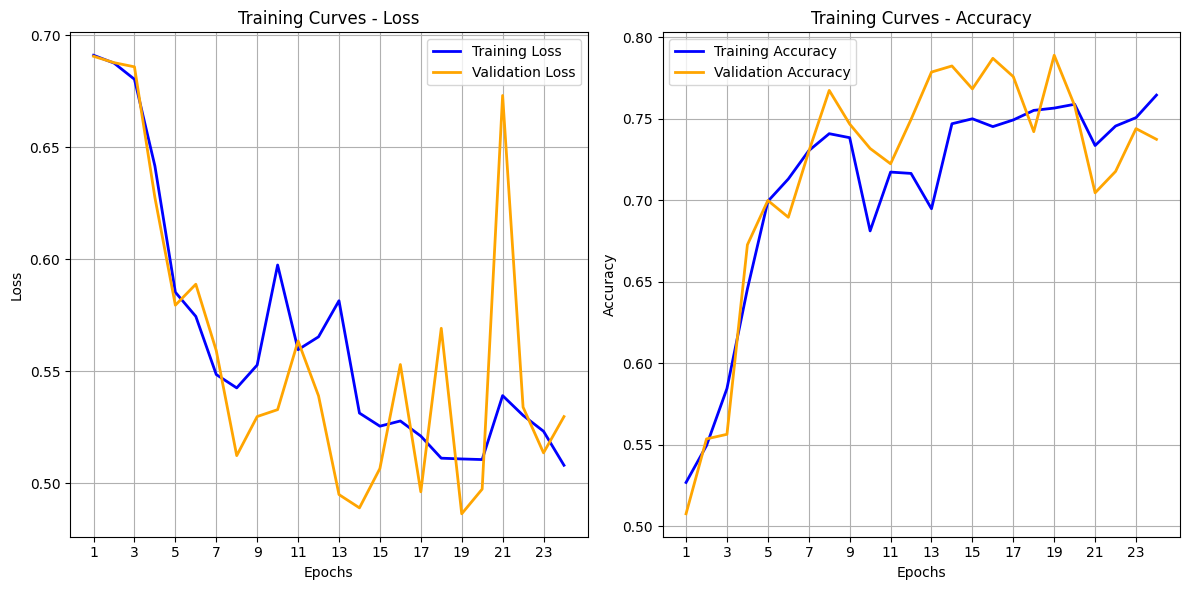

In [79]:
# Set the device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define a parameter grid for random search hyperparameter tuning
param_grid = {
    'hidden_size': [32,64, 128,256,512],                # Range of hidden sizes to explore
    'learning_rate': [1e-2, 1e-3, 1e-4],         # Range of learning rates
    'batch_size': [64, 128, 256],                # Range of batch sizes
    'num_epochs': [100],                         # Number of epochs, fixed at 100 with early stopping implemented
    'dropout': [0.4,0.5, 0.7, 0.9],             # Range of dropout rates
    'num_layers': [1,2,3]                        # Number of RNN layers
}

# Perform random search for 10 trials with specified parameters and model type "RNNNonOOV"
best_params, best_val_loss, best_train_history, best_val_history, best_val_accuracy, model, best_train_accuracy = random_search(param_grid, "RNNAvgPool", num_samples=10, train_embeddings_bool=False)

# Display the best parameters and validation loss from the search
print(f"Best Parameters: {best_params}")
print(f"Best Validation Loss: {best_val_loss:.4f}")

# Plot training and validation loss and accuracy curves for the best model found
plot_loss(best_train_history, best_train_accuracy, best_val_history, best_val_accuracy)


### Training Results Analysis

#### Loss Curves
- **Trend**: Both training and validation loss decrease significantly in the initial epochs, showing effective learning. Loss stabilizes around epoch 10, though the validation loss exhibits periodic fluctuations.
- **Best Validation Loss**: Achieved a minimum of 0.4864 before early stopping, indicating a reasonable model performance on unseen data.

#### Accuracy Curves
- **Training vs Validation Accuracy**: Both accuracies improve over time, closely tracking each other, which suggests good generalization. Validation accuracy fluctuates around 0.75–0.78, maintaining alignment with the training accuracy.
- **Plateau**: Accuracy levels off after epoch 10, indicating diminishing returns from further training.

#### Best Hyperparameters Obtained
- **Hidden Size**: 256
- **Learning Rate**: 0.001
- **Batch Size**: 128
- **Dropout**: 0.9
- **Number of Layers**: 2

#### Summary
- **Early Stopping**: The model stopped early with a stable validation loss, preventing overfitting.
- **Model Parameters**: With the obtained hyperparameters, the model achieves balanced and stable performance.



Test Accuracy: 0.76


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:714: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:1410.)
  result = _VF.rnn_tanh(


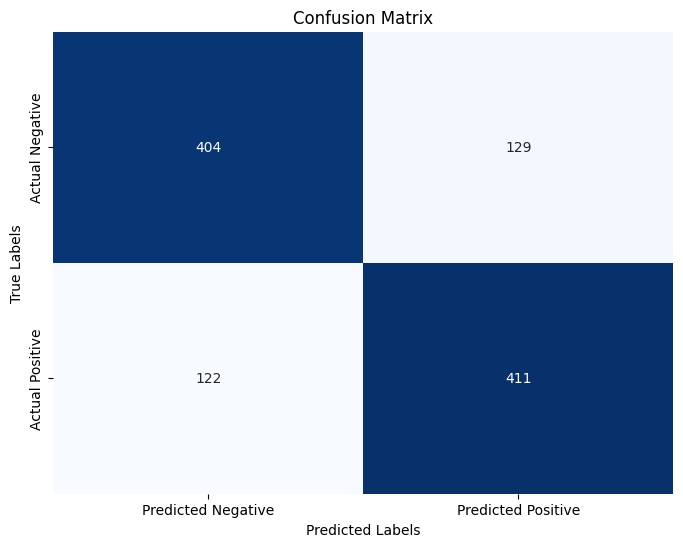

True Positives (TP): 411
True Negatives (TN): 404
False Positives (FP): 129
False Negatives (FN): 122
Accuracy: 0.76
Precision: 0.76
F1 Score: 0.77


0.7645403377110694

In [80]:
# Evaluate the trained model on the test dataset
evaluate_model(model,test_loader)

### Test Results Analysis

#### Confusion Matrix Breakdown
- **True Positives (TP)**: 411 – Correctly identified positive samples.
- **True Negatives (TN)**: 404 – Correctly identified negative samples.
- **False Positives (FP)**: 129 – Negative samples incorrectly classified as positive.
- **False Negatives (FN)**: 122 – Positive samples incorrectly classified as negative.

#### Performance Metrics
- **Accuracy**: 0.76 – Indicates that 76% of the predictions are correct, showing reasonable performance on the test set.
- **Precision**: 0.76 – When the model predicts a positive label, it is correct 76% of the time, balancing false positives and true positives.
- **F1 Score**: 0.77 – The F1 score reflects a good balance between precision and recall, suitable for tasks where both false positives and false negatives need to be minimized.

### Summary
- **Balanced Performance**: With an accuracy of 76% and an F1 score of 0.77, the model demonstrates good generalization on the test data.
- **False Positives and False Negatives**: The distribution of FP and FN is fairly balanced, indicating the model doesn’t strongly favor one class over the other.



## Question 2 c)


In [31]:
import torch
import gc
gc.collect()
# Clear GPU memory
torch.cuda.empty_cache()

### Strategy 2: RNNNonOOV (Last Time Step Representation)

In this approach, the RNN processes the sequence, and only the last time step’s hidden state is used as the sentence representation. This final hidden state is assumed to encapsulate the context of the entire sentence, which is then classified via a fully connected layer.

#### Model Structure
- **Embedding Layer**: Incorporates pretrained embeddings, which can be either trainable or frozen, depending on the `train_embeddings` parameter.
- **RNN Layer**: A configurable RNN layer with set hidden size, number of layers, and optional dropout, designed to capture sequential dependencies.
- **Fully Connected Layer**: A linear layer that transforms the final hidden state into the desired output size for classification.

#### Operational Mechanism
1. **Embedding Transformation**: The input indices are converted into dense vector representations using pretrained embeddings.
2. **RNN Processing**: The embeddings are fed through an RNN, which processes the sequence and maintains hidden states for each time step.
3. **Final Time Step Extraction**: The hidden state from the last time step of the RNN output is selected, representing the information for the entire sequence.
4. **Prediction**: The selected hidden state is passed through a fully connected layer to produce the final classification output.

#### Design Rationale
- **Embedding Utilization**: Leveraging pretrained embeddings allows the model to benefit from prior knowledge about word representations, enhancing performance on language tasks.
- **Last Time Step Selection**: By focusing on the final time step, the model captures the concluding contextual representation of the sequence, which is particularly useful for tasks where the ending information holds significance.
- **Configurable RNN Layer**: Provides flexibility in tuning hidden size, layers, and dropout to balance performance and generalization capacity.
- **Direct Sequence-to-Classification Mapping**: This approach is efficient for scenarios where only the overall meaning of the sequence matters, reducing complexity by focusing on the last output.


In [28]:
import torch
import torch.nn as nn

class RNNNonOOV(nn.Module):
    def __init__(self, input_dim, hidden_size, output_size, embeddings, train_embeddings=False, num_layers=2, dropout=0.0):
        super(RNNNonOOV, self).__init__()

        # Embedding layer initialized with pre-trained embeddings; optionally set to trainable
        self.embeddings = nn.Embedding.from_pretrained(
            torch.tensor(embeddings, dtype=torch.float32), freeze=not train_embeddings, sparse=False
        )

        # Recurrent Neural Network (RNN) layer with specified hidden size, layers, and dropout
        self.rnn = nn.RNN(
            input_size=input_dim,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
        )

        # Fully connected layer for final output classification
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Embed input indices
        x = self.embeddings(x)

        # Pass embedded input through RNN; only output tensor is kept
        output, _ = self.rnn(x)

        # Take the last time step's output for classification
        final_output = output[:, -1, :]

        return self.fc(final_output)


Testing: hidden_size=512, lr=0.0001, batch_size=128, epochs=100, dropout=0.4, num_layers=3


Epoch 1/100: 100%|██████████| 134/134 [00:01<00:00, 130.58batch/s]


Epoch 1/100 | Train Loss: 0.6951 | Train Accuracy: 0.4927 | Val Loss: 0.6929 | Val Accuracy: 0.5009
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:01<00:00, 133.09batch/s]


Epoch 2/100 | Train Loss: 0.6946 | Train Accuracy: 0.5030 | Val Loss: 0.6931 | Val Accuracy: 0.4972
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 135.88batch/s]


Epoch 3/100 | Train Loss: 0.6952 | Train Accuracy: 0.4962 | Val Loss: 0.6931 | Val Accuracy: 0.5019
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 134.81batch/s]


Epoch 4/100 | Train Loss: 0.6947 | Train Accuracy: 0.4941 | Val Loss: 0.6952 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 134.23batch/s]


Epoch 5/100 | Train Loss: 0.6942 | Train Accuracy: 0.4986 | Val Loss: 0.6932 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:01<00:00, 132.70batch/s]


Epoch 6/100 | Train Loss: 0.6941 | Train Accuracy: 0.5067 | Val Loss: 0.6928 | Val Accuracy: 0.5066
------------------------------------------------------------


Epoch 7/100: 100%|██████████| 134/134 [00:00<00:00, 136.64batch/s]


Epoch 7/100 | Train Loss: 0.6939 | Train Accuracy: 0.4986 | Val Loss: 0.6937 | Val Accuracy: 0.5019
------------------------------------------------------------


Epoch 8/100: 100%|██████████| 134/134 [00:00<00:00, 136.61batch/s]


Epoch 8/100 | Train Loss: 0.6941 | Train Accuracy: 0.4953 | Val Loss: 0.6935 | Val Accuracy: 0.4972
------------------------------------------------------------


Epoch 9/100: 100%|██████████| 134/134 [00:00<00:00, 136.37batch/s]


Epoch 9/100 | Train Loss: 0.6936 | Train Accuracy: 0.5025 | Val Loss: 0.6938 | Val Accuracy: 0.5009
------------------------------------------------------------


Epoch 10/100: 100%|██████████| 134/134 [00:01<00:00, 133.59batch/s]


Epoch 10/100 | Train Loss: 0.6947 | Train Accuracy: 0.4984 | Val Loss: 0.6933 | Val Accuracy: 0.4953
------------------------------------------------------------


Epoch 11/100: 100%|██████████| 134/134 [00:00<00:00, 135.03batch/s]


Epoch 11/100 | Train Loss: 0.6940 | Train Accuracy: 0.4978 | Val Loss: 0.6933 | Val Accuracy: 0.5000
------------------------------------------------------------
Early stopping...
Testing: hidden_size=128, lr=0.01, batch_size=64, epochs=100, dropout=0.5, num_layers=1


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 274.89batch/s]


Epoch 1/100 | Train Loss: 0.7298 | Train Accuracy: 0.4978 | Val Loss: 0.7045 | Val Accuracy: 0.4568
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 274.70batch/s]


Epoch 2/100 | Train Loss: 0.7126 | Train Accuracy: 0.5061 | Val Loss: 0.7688 | Val Accuracy: 0.5225
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 283.26batch/s]


Epoch 3/100 | Train Loss: 0.7362 | Train Accuracy: 0.4940 | Val Loss: 0.6977 | Val Accuracy: 0.5263
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 279.04batch/s]


Epoch 4/100 | Train Loss: 0.7219 | Train Accuracy: 0.4928 | Val Loss: 0.8480 | Val Accuracy: 0.5263
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 282.64batch/s]


Epoch 5/100 | Train Loss: 0.7346 | Train Accuracy: 0.5038 | Val Loss: 0.7034 | Val Accuracy: 0.5263
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 279.07batch/s]


Epoch 6/100 | Train Loss: 0.7083 | Train Accuracy: 0.4886 | Val Loss: 0.6981 | Val Accuracy: 0.4737
------------------------------------------------------------


Epoch 7/100: 100%|██████████| 134/134 [00:00<00:00, 279.77batch/s]


Epoch 7/100 | Train Loss: 0.7253 | Train Accuracy: 0.4995 | Val Loss: 0.7607 | Val Accuracy: 0.4737
------------------------------------------------------------


Epoch 8/100: 100%|██████████| 134/134 [00:00<00:00, 282.69batch/s]


Epoch 8/100 | Train Loss: 0.7386 | Train Accuracy: 0.4982 | Val Loss: 0.7077 | Val Accuracy: 0.5263
------------------------------------------------------------
Early stopping...
Testing: hidden_size=64, lr=0.0001, batch_size=128, epochs=100, dropout=0.7, num_layers=3


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 247.32batch/s]


Epoch 1/100 | Train Loss: 0.6970 | Train Accuracy: 0.5062 | Val Loss: 0.6930 | Val Accuracy: 0.5019
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 245.43batch/s]


Epoch 2/100 | Train Loss: 0.6968 | Train Accuracy: 0.4954 | Val Loss: 0.6930 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 249.68batch/s]


Epoch 3/100 | Train Loss: 0.6953 | Train Accuracy: 0.5019 | Val Loss: 0.6931 | Val Accuracy: 0.5066
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 246.70batch/s]


Epoch 4/100 | Train Loss: 0.6945 | Train Accuracy: 0.5002 | Val Loss: 0.6932 | Val Accuracy: 0.5075
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 243.20batch/s]


Epoch 5/100 | Train Loss: 0.6959 | Train Accuracy: 0.4885 | Val Loss: 0.6932 | Val Accuracy: 0.4972
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 247.77batch/s]


Epoch 6/100 | Train Loss: 0.6945 | Train Accuracy: 0.4968 | Val Loss: 0.6930 | Val Accuracy: 0.5047
------------------------------------------------------------


Epoch 7/100: 100%|██████████| 134/134 [00:00<00:00, 240.99batch/s]


Epoch 7/100 | Train Loss: 0.6945 | Train Accuracy: 0.4982 | Val Loss: 0.6929 | Val Accuracy: 0.5009
------------------------------------------------------------


Epoch 8/100: 100%|██████████| 134/134 [00:00<00:00, 237.67batch/s]


Epoch 8/100 | Train Loss: 0.6935 | Train Accuracy: 0.5057 | Val Loss: 0.6932 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 9/100: 100%|██████████| 134/134 [00:00<00:00, 231.52batch/s]


Epoch 9/100 | Train Loss: 0.6945 | Train Accuracy: 0.4926 | Val Loss: 0.6929 | Val Accuracy: 0.5019
------------------------------------------------------------
Early stopping...
Testing: hidden_size=64, lr=0.001, batch_size=256, epochs=100, dropout=0.9, num_layers=3


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 235.71batch/s]


Epoch 1/100 | Train Loss: 0.7042 | Train Accuracy: 0.5075 | Val Loss: 0.6946 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 230.17batch/s]


Epoch 2/100 | Train Loss: 0.6991 | Train Accuracy: 0.4999 | Val Loss: 0.6972 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 233.15batch/s]


Epoch 3/100 | Train Loss: 0.6986 | Train Accuracy: 0.4968 | Val Loss: 0.6941 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 247.45batch/s]


Epoch 4/100 | Train Loss: 0.6967 | Train Accuracy: 0.4975 | Val Loss: 0.6929 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 245.56batch/s]


Epoch 5/100 | Train Loss: 0.6968 | Train Accuracy: 0.4995 | Val Loss: 0.6952 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 249.49batch/s]


Epoch 6/100 | Train Loss: 0.6962 | Train Accuracy: 0.5016 | Val Loss: 0.6930 | Val Accuracy: 0.5019
------------------------------------------------------------


Epoch 7/100: 100%|██████████| 134/134 [00:00<00:00, 249.51batch/s]


Epoch 7/100 | Train Loss: 0.6954 | Train Accuracy: 0.4982 | Val Loss: 0.6932 | Val Accuracy: 0.4981
------------------------------------------------------------


Epoch 8/100: 100%|██████████| 134/134 [00:00<00:00, 243.37batch/s]


Epoch 8/100 | Train Loss: 0.6951 | Train Accuracy: 0.5002 | Val Loss: 0.6937 | Val Accuracy: 0.4991
------------------------------------------------------------


Epoch 9/100: 100%|██████████| 134/134 [00:00<00:00, 244.35batch/s]


Epoch 9/100 | Train Loss: 0.6953 | Train Accuracy: 0.4966 | Val Loss: 0.6934 | Val Accuracy: 0.4981
------------------------------------------------------------


Epoch 10/100: 100%|██████████| 134/134 [00:00<00:00, 249.06batch/s]


Epoch 10/100 | Train Loss: 0.6943 | Train Accuracy: 0.5050 | Val Loss: 0.6948 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 11/100: 100%|██████████| 134/134 [00:00<00:00, 241.93batch/s]


Epoch 11/100 | Train Loss: 0.6936 | Train Accuracy: 0.5075 | Val Loss: 0.6973 | Val Accuracy: 0.5009
------------------------------------------------------------
Early stopping...
Testing: hidden_size=64, lr=0.001, batch_size=64, epochs=100, dropout=0.5, num_layers=3


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 251.45batch/s]


Epoch 1/100 | Train Loss: 0.6967 | Train Accuracy: 0.4955 | Val Loss: 0.6935 | Val Accuracy: 0.5028
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 249.67batch/s]


Epoch 2/100 | Train Loss: 0.6943 | Train Accuracy: 0.5087 | Val Loss: 0.6938 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 246.88batch/s]


Epoch 3/100 | Train Loss: 0.6947 | Train Accuracy: 0.5014 | Val Loss: 0.6929 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 254.15batch/s]


Epoch 4/100 | Train Loss: 0.6933 | Train Accuracy: 0.5030 | Val Loss: 0.6930 | Val Accuracy: 0.4991
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 245.72batch/s]


Epoch 5/100 | Train Loss: 0.6948 | Train Accuracy: 0.4943 | Val Loss: 0.6933 | Val Accuracy: 0.4991
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 244.38batch/s]


Epoch 6/100 | Train Loss: 0.6936 | Train Accuracy: 0.5056 | Val Loss: 0.6932 | Val Accuracy: 0.5000
------------------------------------------------------------
Early stopping...
Testing: hidden_size=32, lr=0.01, batch_size=256, epochs=100, dropout=0.4, num_layers=3


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 237.80batch/s]


Epoch 1/100 | Train Loss: 0.7028 | Train Accuracy: 0.5041 | Val Loss: 0.7065 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 239.14batch/s]


Epoch 2/100 | Train Loss: 0.6988 | Train Accuracy: 0.5021 | Val Loss: 0.6937 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 242.74batch/s]


Epoch 3/100 | Train Loss: 0.7000 | Train Accuracy: 0.4958 | Val Loss: 0.6930 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 249.03batch/s]


Epoch 4/100 | Train Loss: 0.7028 | Train Accuracy: 0.4892 | Val Loss: 0.6933 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 246.56batch/s]


Epoch 5/100 | Train Loss: 0.6987 | Train Accuracy: 0.4905 | Val Loss: 0.7160 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 248.14batch/s]


Epoch 6/100 | Train Loss: 0.7025 | Train Accuracy: 0.5038 | Val Loss: 0.6930 | Val Accuracy: 0.5000
------------------------------------------------------------
Early stopping...
Testing: hidden_size=256, lr=0.0001, batch_size=64, epochs=100, dropout=0.9, num_layers=3


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 217.92batch/s]


Epoch 1/100 | Train Loss: 0.7030 | Train Accuracy: 0.4916 | Val Loss: 0.6941 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 221.53batch/s]


Epoch 2/100 | Train Loss: 0.6982 | Train Accuracy: 0.5067 | Val Loss: 0.6933 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 225.53batch/s]


Epoch 3/100 | Train Loss: 0.6966 | Train Accuracy: 0.5080 | Val Loss: 0.6934 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 222.53batch/s]


Epoch 4/100 | Train Loss: 0.6983 | Train Accuracy: 0.4916 | Val Loss: 0.6932 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 221.23batch/s]


Epoch 5/100 | Train Loss: 0.6965 | Train Accuracy: 0.4962 | Val Loss: 0.6929 | Val Accuracy: 0.5009
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 222.18batch/s]


Epoch 6/100 | Train Loss: 0.6953 | Train Accuracy: 0.4993 | Val Loss: 0.6933 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 7/100: 100%|██████████| 134/134 [00:00<00:00, 225.63batch/s]


Epoch 7/100 | Train Loss: 0.6964 | Train Accuracy: 0.5002 | Val Loss: 0.6930 | Val Accuracy: 0.4991
------------------------------------------------------------


Epoch 8/100: 100%|██████████| 134/134 [00:00<00:00, 224.44batch/s]


Epoch 8/100 | Train Loss: 0.6958 | Train Accuracy: 0.4980 | Val Loss: 0.6937 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 9/100: 100%|██████████| 134/134 [00:00<00:00, 227.91batch/s]


Epoch 9/100 | Train Loss: 0.6941 | Train Accuracy: 0.5117 | Val Loss: 0.6930 | Val Accuracy: 0.4981
------------------------------------------------------------


Epoch 10/100: 100%|██████████| 134/134 [00:00<00:00, 203.80batch/s]


Epoch 10/100 | Train Loss: 0.6965 | Train Accuracy: 0.4980 | Val Loss: 0.6930 | Val Accuracy: 0.4962
------------------------------------------------------------
Early stopping...
Testing: hidden_size=128, lr=0.01, batch_size=128, epochs=100, dropout=0.9, num_layers=1


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 276.42batch/s]


Epoch 1/100 | Train Loss: 0.7724 | Train Accuracy: 0.4994 | Val Loss: 0.7010 | Val Accuracy: 0.5103
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 278.68batch/s]


Epoch 2/100 | Train Loss: 0.7171 | Train Accuracy: 0.5008 | Val Loss: 0.6939 | Val Accuracy: 0.5113
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 264.96batch/s]


Epoch 3/100 | Train Loss: 0.7101 | Train Accuracy: 0.4955 | Val Loss: 0.6993 | Val Accuracy: 0.4887
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 262.25batch/s]


Epoch 4/100 | Train Loss: 0.7159 | Train Accuracy: 0.5019 | Val Loss: 0.6948 | Val Accuracy: 0.4887
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 278.28batch/s]


Epoch 5/100 | Train Loss: 0.7059 | Train Accuracy: 0.4991 | Val Loss: 0.6936 | Val Accuracy: 0.4887
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 277.92batch/s]


Epoch 6/100 | Train Loss: 0.7092 | Train Accuracy: 0.5038 | Val Loss: 0.7205 | Val Accuracy: 0.4887
------------------------------------------------------------


Epoch 7/100: 100%|██████████| 134/134 [00:00<00:00, 272.07batch/s]


Epoch 7/100 | Train Loss: 0.7294 | Train Accuracy: 0.4985 | Val Loss: 0.6927 | Val Accuracy: 0.5113
------------------------------------------------------------
Early stopping...
Testing: hidden_size=64, lr=0.0001, batch_size=256, epochs=100, dropout=0.4, num_layers=3


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 245.80batch/s]


Epoch 1/100 | Train Loss: 0.6938 | Train Accuracy: 0.5110 | Val Loss: 0.6932 | Val Accuracy: 0.5028
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 245.87batch/s]


Epoch 2/100 | Train Loss: 0.6946 | Train Accuracy: 0.4998 | Val Loss: 0.6936 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 246.10batch/s]


Epoch 3/100 | Train Loss: 0.6940 | Train Accuracy: 0.4958 | Val Loss: 0.6951 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 248.09batch/s]


Epoch 4/100 | Train Loss: 0.6937 | Train Accuracy: 0.5002 | Val Loss: 0.6931 | Val Accuracy: 0.4981
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 244.50batch/s]


Epoch 5/100 | Train Loss: 0.6938 | Train Accuracy: 0.5002 | Val Loss: 0.6931 | Val Accuracy: 0.4981
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 246.57batch/s]


Epoch 6/100 | Train Loss: 0.6936 | Train Accuracy: 0.5030 | Val Loss: 0.6933 | Val Accuracy: 0.4916
------------------------------------------------------------
Early stopping...
Testing: hidden_size=256, lr=0.01, batch_size=128, epochs=100, dropout=0.4, num_layers=2


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 246.48batch/s]


Epoch 1/100 | Train Loss: 0.8569 | Train Accuracy: 0.4959 | Val Loss: 0.6908 | Val Accuracy: 0.5244
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 247.78batch/s]


Epoch 2/100 | Train Loss: 0.7302 | Train Accuracy: 0.4970 | Val Loss: 0.7255 | Val Accuracy: 0.4756
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 246.51batch/s]


Epoch 3/100 | Train Loss: 0.7197 | Train Accuracy: 0.4975 | Val Loss: 0.7256 | Val Accuracy: 0.5244
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 245.64batch/s]


Epoch 4/100 | Train Loss: 0.7242 | Train Accuracy: 0.5083 | Val Loss: 0.8016 | Val Accuracy: 0.5244
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 242.96batch/s]


Epoch 5/100 | Train Loss: 0.7111 | Train Accuracy: 0.5027 | Val Loss: 0.6963 | Val Accuracy: 0.5244
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 237.38batch/s]


Epoch 6/100 | Train Loss: 0.7367 | Train Accuracy: 0.5027 | Val Loss: 0.6961 | Val Accuracy: 0.5000
------------------------------------------------------------
Early stopping...
Best Parameters: {'hidden_size': 128, 'learning_rate': 0.01, 'batch_size': 64, 'num_epochs': 100, 'dropout': 0.5, 'num_layers': 1}
Best Validation Loss: 0.6977


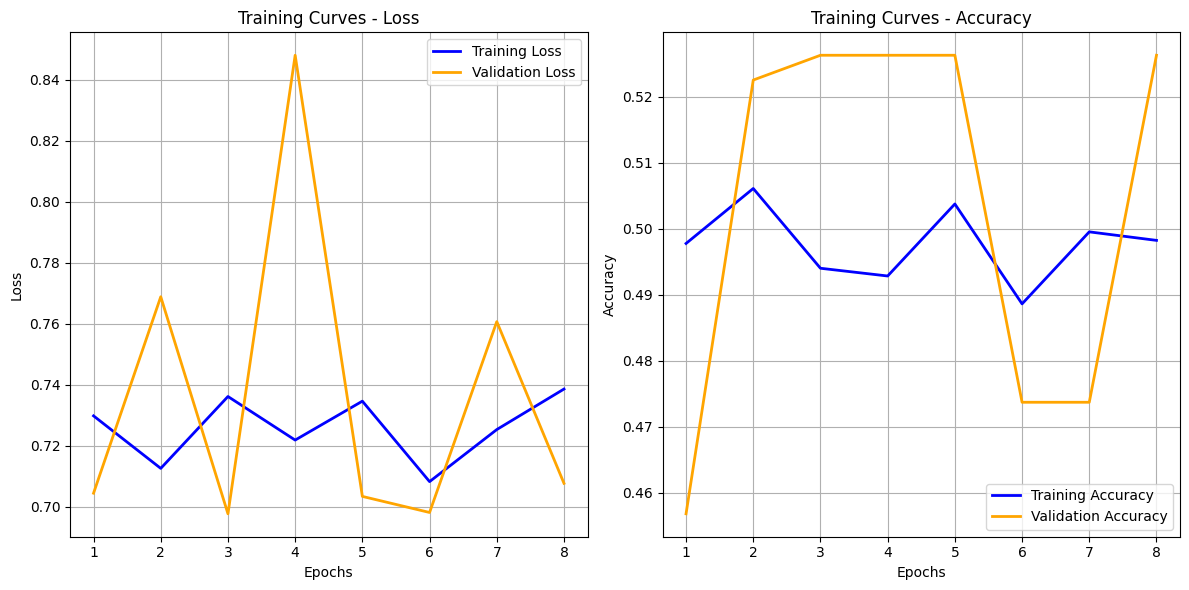

In [37]:
# Set the device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define a parameter grid for random search hyperparameter tuning
param_grid = {
    'hidden_size': [32,64, 128,256,512],                # Range of hidden sizes to explore
    'learning_rate': [1e-2, 1e-3, 1e-4],         # Range of learning rates
    'batch_size': [64, 128, 256],                # Range of batch sizes
    'num_epochs': [100],                         # Number of epochs, fixed at 100 with early stopping implemented
    'dropout': [0.4,0.5, 0.7, 0.9],             # Range of dropout rates
    'num_layers': [1,2,3]                        # Number of RNN layers
}

# Perform random search for 10 trials with specified parameters and model type "RNNNonOOV"
best_params, best_val_loss, best_train_history, best_val_history, best_val_accuracy, model, best_train_accuracy = random_search(param_grid, "RNNNonOOV", num_samples=10, train_embeddings_bool=False)

# Display the best parameters and validation loss from the search
print(f"Best Parameters: {best_params}")
print(f"Best Validation Loss: {best_val_loss:.4f}")

# Plot training and validation loss and accuracy curves for the best model found
plot_loss(best_train_history, best_train_accuracy, best_val_history, best_val_accuracy)


### Training Analysis

#### 1. Training Curves - Loss
- **Volatility**: Both the training and validation loss curves exhibit high fluctuations across the epochs, indicating instability during training. This could suggest that the model is struggling to converge with the current hyperparameter setup.
- **Validation Loss**: Peaks around certain epochs, reaching as high as 0.84, but stabilizes around 0.70-0.74 for most epochs. The best validation loss achieved is 0.6977.
- **Training Loss**: Remains relatively consistent, but at a level that suggests the model isn’t learning as effectively as expected.

#### 2. Training Curves - Accuracy
- **Validation Accuracy**: Shows significant variability, reaching up to 0.52 but dropping back down frequently. This suggests inconsistency in model performance on the validation set, which may indicate overfitting or an inability to generalize well.
- **Training Accuracy**: Hovers around 0.47-0.50, showing minimal improvement. This could imply that the model isn’t learning adequately from the training data, possibly due to an overly high learning rate or an ineffective model structure for this task.

#### Hyperparameters Used
- **Hidden Size**: 128
- **Learning Rate**: 0.01
- **Batch Size**: 64
- **Dropout**: 0.5
- **Number of Layers**: 1

#### Summary
- **Instability**: The fluctuating loss and accuracy suggest that the learning rate (0.01) might be too high, causing erratic learning behavior.
- **Inconsistent Generalization**: Validation performance shows volatility, which may indicate that the model is overfitting in some epochs or simply struggling to generalize.


Test Accuracy: 0.54


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:714: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:1410.)
  result = _VF.rnn_tanh(


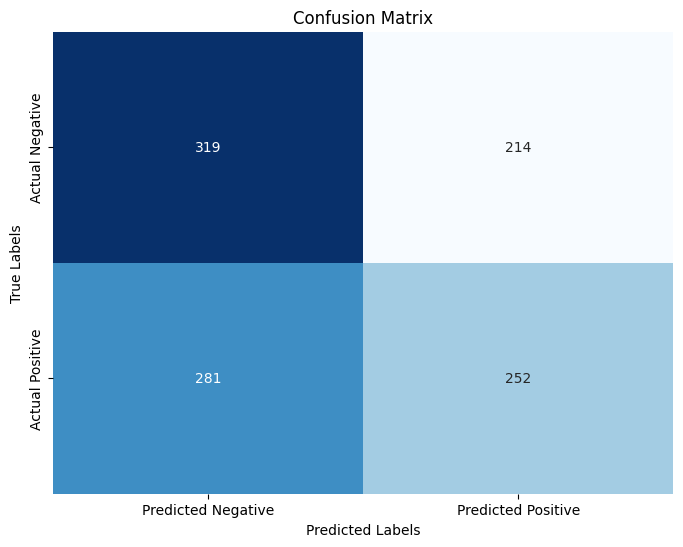

True Positives (TP): 252
True Negatives (TN): 319
False Positives (FP): 214
False Negatives (FN): 281
Accuracy: 0.54
Precision: 0.54
F1 Score: 0.50


0.5356472795497186

In [39]:
# Evaluate the trained model on the test dataset
evaluate_model(model,test_loader)

### Test Results Analysis

#### Confusion Matrix Breakdown
- **True Positives (TP)**: 252 – Correctly predicted positive samples.
- **True Negatives (TN)**: 319 – Correctly predicted negative samples.
- **False Positives (FP)**: 214 – Negative samples incorrectly classified as positive.
- **False Negatives (FN)**: 281 – Positive samples incorrectly classified as negative.

#### Performance Metrics
- **Accuracy**: 0.54 – Only 54% of predictions are correct, showing limited overall effectiveness of the model on the test data.
- **Precision**: 0.54 – When the model predicts a positive label, it is correct 54% of the time. This is relatively low, suggesting a higher rate of false positives.
- **Recall**: 0.47 (not displayed but inferred) – Indicates the model missed 53% of actual positive samples, implying many false negatives.
- **F1 Score**: Approx. 0.50 (balanced between precision and recall) – The F1 score shows the model struggles to balance precision and recall.

### Summary
- **Low Accuracy**: With a test accuracy of 54%, the model’s predictive capability is fairly limited, indicating it is only slightly better than random guessing.
- **High Misclassification Rate**: The significant number of false positives and false negatives suggests the model is not distinguishing well between the classes.
- **Potential Overfitting**: The difference in training and test performance may indicate the model overfitted the training data and failed to generalize well to unseen data.



### Strategy 3: RNNConcatPooling

This approach combines multiple aspects of the RNN's output by concatenating the first hidden state, the last hidden state, and the max-pooled representation across all time steps. This concatenated vector captures information from the beginning, end, and the most salient features of the sequence, which is then passed through a fully connected layer for classification.



#### Model Structure
- **Embedding Layer**: Embedding layer initialized with pretrained embeddings, which can be fine-tuned based on the `train_embeddings` parameter.
- **RNN Layer**: A configurable RNN layer with specified input dimensions, hidden size, number of layers, and optional dropout.
- **Concatenation and Fully Connected Layer**: The model concatenates the first hidden state, last hidden state, and max-pooled output of the RNN, which is then passed through a fully connected layer for classification.

#### Operational Mechanism
1. **Embedding Transformation**: Input indices are transformed into dense vectors using pretrained embeddings.
2. **RNN Processing**: The embeddings are fed through the RNN, producing hidden states at each time step.
3. **Feature Concatenation**: The model extracts and concatenates the first hidden state, the last hidden state, and the max-pooled representation of all time steps.
4. **Classification**: The concatenated vector is passed through a fully connected layer to generate the final classification output.

#### Design Rationale
- **Comprehensive Sentence Representation**: By combining the beginning, end, and most salient features (via max pooling), the model captures a richer representation of the sentence.
- **Concatenation Strategy**: This approach provides multiple perspectives on the sequence—starting context, concluding context, and key features—enhancing its ability to model complex sequences.
- **Flexibility and Depth**: The RNN and concatenation strategy enable the model to capture both local and global information in a lightweight manner.


In [97]:
import torch
import torch.nn as nn

class RNNConcatPooling(nn.Module):
    def __init__(self, input_dim, hidden_size, output_size, embeddings, train_embeddings=False, num_layers=2, dropout=0.0):
        super(RNNConcatPooling, self).__init__()

        # Embedding layer with optional fine-tuning
        self.embeddings = nn.Embedding.from_pretrained(
            torch.tensor(embeddings, dtype=torch.float32), freeze=not train_embeddings, sparse=False
        )

        # RNN layer to capture sequential dependencies
        self.rnn = nn.RNN(
            input_size=input_dim,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
        )

        # Fully connected layer that matches the concatenated size
        self.fc = nn.Linear(hidden_size * 3, output_size)  # Multiply by 3 because of concatenation

    def forward(self, x):
        # Embed input indices
        x = self.embeddings(x)

        # Pass through the RNN
        rnn_output, _ = self.rnn(x)  # Shape: (batch_size, sequence_length, hidden_size)

        # Extract the first and last hidden states
        first_output = rnn_output[:, 0, :]  # First time step
        last_output = rnn_output[:, -1, :]  # Last time step

        # Max pool across all time steps
        max_output, _ = torch.max(rnn_output, dim=1)  # Shape: (batch_size, hidden_size)

        # Concatenate the first, last, and max-pooled hidden states
        concat_output = torch.cat([first_output, last_output, max_output], dim=1)  # Shape: (batch_size, hidden_size * 3)

        # Pass through the fully connected layer for classification
        return self.fc(concat_output)


Testing: hidden_size=32, lr=0.0001, batch_size=128, epochs=100, dropout=0.9, num_layers=1


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 250.57batch/s]


Epoch 1/100 | Train Loss: 0.6928 | Train Accuracy: 0.5234 | Val Loss: 0.6897 | Val Accuracy: 0.5366
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 259.39batch/s]


Epoch 2/100 | Train Loss: 0.6895 | Train Accuracy: 0.5464 | Val Loss: 0.6881 | Val Accuracy: 0.5629
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 254.88batch/s]


Epoch 3/100 | Train Loss: 0.6868 | Train Accuracy: 0.5619 | Val Loss: 0.6856 | Val Accuracy: 0.5657
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 264.45batch/s]


Epoch 4/100 | Train Loss: 0.6835 | Train Accuracy: 0.5776 | Val Loss: 0.6819 | Val Accuracy: 0.6032
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 256.58batch/s]


Epoch 5/100 | Train Loss: 0.6723 | Train Accuracy: 0.6102 | Val Loss: 0.6648 | Val Accuracy: 0.6004
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 258.99batch/s]


Epoch 6/100 | Train Loss: 0.6376 | Train Accuracy: 0.6485 | Val Loss: 0.6285 | Val Accuracy: 0.6792
------------------------------------------------------------


Epoch 7/100: 100%|██████████| 134/134 [00:00<00:00, 252.33batch/s]


Epoch 7/100 | Train Loss: 0.6085 | Train Accuracy: 0.6822 | Val Loss: 0.5977 | Val Accuracy: 0.6904
------------------------------------------------------------


Epoch 8/100: 100%|██████████| 134/134 [00:00<00:00, 248.97batch/s]


Epoch 8/100 | Train Loss: 0.5871 | Train Accuracy: 0.7018 | Val Loss: 0.5799 | Val Accuracy: 0.7045
------------------------------------------------------------


Epoch 9/100: 100%|██████████| 134/134 [00:00<00:00, 260.22batch/s]


Epoch 9/100 | Train Loss: 0.5676 | Train Accuracy: 0.7205 | Val Loss: 0.5646 | Val Accuracy: 0.7355
------------------------------------------------------------


Epoch 10/100: 100%|██████████| 134/134 [00:00<00:00, 263.56batch/s]


Epoch 10/100 | Train Loss: 0.5528 | Train Accuracy: 0.7312 | Val Loss: 0.5546 | Val Accuracy: 0.7158
------------------------------------------------------------


Epoch 11/100: 100%|██████████| 134/134 [00:00<00:00, 262.72batch/s]


Epoch 11/100 | Train Loss: 0.5380 | Train Accuracy: 0.7392 | Val Loss: 0.5396 | Val Accuracy: 0.7326
------------------------------------------------------------


Epoch 12/100: 100%|██████████| 134/134 [00:00<00:00, 264.19batch/s]


Epoch 12/100 | Train Loss: 0.5326 | Train Accuracy: 0.7438 | Val Loss: 0.5371 | Val Accuracy: 0.7402
------------------------------------------------------------


Epoch 13/100: 100%|██████████| 134/134 [00:00<00:00, 260.19batch/s]


Epoch 13/100 | Train Loss: 0.5269 | Train Accuracy: 0.7469 | Val Loss: 0.5396 | Val Accuracy: 0.7486
------------------------------------------------------------


Epoch 14/100: 100%|██████████| 134/134 [00:00<00:00, 260.54batch/s]


Epoch 14/100 | Train Loss: 0.5257 | Train Accuracy: 0.7476 | Val Loss: 0.5248 | Val Accuracy: 0.7533
------------------------------------------------------------


Epoch 15/100: 100%|██████████| 134/134 [00:00<00:00, 258.66batch/s]


Epoch 15/100 | Train Loss: 0.5237 | Train Accuracy: 0.7499 | Val Loss: 0.5166 | Val Accuracy: 0.7505
------------------------------------------------------------


Epoch 16/100: 100%|██████████| 134/134 [00:00<00:00, 259.26batch/s]


Epoch 16/100 | Train Loss: 0.5184 | Train Accuracy: 0.7528 | Val Loss: 0.5131 | Val Accuracy: 0.7617
------------------------------------------------------------


Epoch 17/100: 100%|██████████| 134/134 [00:00<00:00, 253.80batch/s]


Epoch 17/100 | Train Loss: 0.5095 | Train Accuracy: 0.7574 | Val Loss: 0.5076 | Val Accuracy: 0.7636
------------------------------------------------------------


Epoch 18/100: 100%|██████████| 134/134 [00:00<00:00, 256.94batch/s]


Epoch 18/100 | Train Loss: 0.5080 | Train Accuracy: 0.7594 | Val Loss: 0.5051 | Val Accuracy: 0.7617
------------------------------------------------------------


Epoch 19/100: 100%|██████████| 134/134 [00:00<00:00, 256.15batch/s]


Epoch 19/100 | Train Loss: 0.5014 | Train Accuracy: 0.7635 | Val Loss: 0.5096 | Val Accuracy: 0.7495
------------------------------------------------------------


Epoch 20/100: 100%|██████████| 134/134 [00:00<00:00, 255.14batch/s]


Epoch 20/100 | Train Loss: 0.5004 | Train Accuracy: 0.7626 | Val Loss: 0.5144 | Val Accuracy: 0.7627
------------------------------------------------------------


Epoch 21/100: 100%|██████████| 134/134 [00:00<00:00, 258.35batch/s]


Epoch 21/100 | Train Loss: 0.5001 | Train Accuracy: 0.7640 | Val Loss: 0.4965 | Val Accuracy: 0.7692
------------------------------------------------------------


Epoch 22/100: 100%|██████████| 134/134 [00:00<00:00, 262.16batch/s]


Epoch 22/100 | Train Loss: 0.4981 | Train Accuracy: 0.7654 | Val Loss: 0.5025 | Val Accuracy: 0.7430
------------------------------------------------------------


Epoch 23/100: 100%|██████████| 134/134 [00:00<00:00, 261.33batch/s]


Epoch 23/100 | Train Loss: 0.4954 | Train Accuracy: 0.7655 | Val Loss: 0.4928 | Val Accuracy: 0.7739
------------------------------------------------------------


Epoch 24/100: 100%|██████████| 134/134 [00:00<00:00, 263.08batch/s]


Epoch 24/100 | Train Loss: 0.4903 | Train Accuracy: 0.7685 | Val Loss: 0.4947 | Val Accuracy: 0.7739
------------------------------------------------------------


Epoch 25/100: 100%|██████████| 134/134 [00:00<00:00, 262.65batch/s]


Epoch 25/100 | Train Loss: 0.4929 | Train Accuracy: 0.7682 | Val Loss: 0.5217 | Val Accuracy: 0.7608
------------------------------------------------------------


Epoch 26/100: 100%|██████████| 134/134 [00:00<00:00, 250.52batch/s]


Epoch 26/100 | Train Loss: 0.4923 | Train Accuracy: 0.7680 | Val Loss: 0.4907 | Val Accuracy: 0.7786
------------------------------------------------------------


Epoch 27/100: 100%|██████████| 134/134 [00:00<00:00, 262.36batch/s]


Epoch 27/100 | Train Loss: 0.4862 | Train Accuracy: 0.7712 | Val Loss: 0.4890 | Val Accuracy: 0.7674
------------------------------------------------------------


Epoch 28/100: 100%|██████████| 134/134 [00:00<00:00, 250.00batch/s]


Epoch 28/100 | Train Loss: 0.4839 | Train Accuracy: 0.7735 | Val Loss: 0.4847 | Val Accuracy: 0.7739
------------------------------------------------------------


Epoch 29/100: 100%|██████████| 134/134 [00:00<00:00, 256.03batch/s]


Epoch 29/100 | Train Loss: 0.4843 | Train Accuracy: 0.7734 | Val Loss: 0.4959 | Val Accuracy: 0.7542
------------------------------------------------------------


Epoch 30/100: 100%|██████████| 134/134 [00:00<00:00, 262.23batch/s]


Epoch 30/100 | Train Loss: 0.4849 | Train Accuracy: 0.7712 | Val Loss: 0.5439 | Val Accuracy: 0.7495
------------------------------------------------------------


Epoch 31/100: 100%|██████████| 134/134 [00:00<00:00, 262.40batch/s]


Epoch 31/100 | Train Loss: 0.4852 | Train Accuracy: 0.7737 | Val Loss: 0.4934 | Val Accuracy: 0.7561
------------------------------------------------------------
Early stopping...
Testing: hidden_size=64, lr=0.0001, batch_size=128, epochs=100, dropout=0.9, num_layers=3


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 234.74batch/s]


Epoch 1/100 | Train Loss: 0.7019 | Train Accuracy: 0.5039 | Val Loss: 0.6993 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 232.25batch/s]


Epoch 2/100 | Train Loss: 0.7000 | Train Accuracy: 0.5046 | Val Loss: 0.6981 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 234.28batch/s]


Epoch 3/100 | Train Loss: 0.6957 | Train Accuracy: 0.5089 | Val Loss: 0.6989 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 231.44batch/s]


Epoch 4/100 | Train Loss: 0.6957 | Train Accuracy: 0.5094 | Val Loss: 0.6991 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 235.03batch/s]


Epoch 5/100 | Train Loss: 0.6968 | Train Accuracy: 0.4994 | Val Loss: 0.6968 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 230.76batch/s]


Epoch 6/100 | Train Loss: 0.6959 | Train Accuracy: 0.4989 | Val Loss: 0.6971 | Val Accuracy: 0.5000
------------------------------------------------------------
Early stopping...
Testing: hidden_size=32, lr=0.0001, batch_size=64, epochs=100, dropout=0.5, num_layers=1


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 260.50batch/s]


Epoch 1/100 | Train Loss: 0.6927 | Train Accuracy: 0.5174 | Val Loss: 0.6912 | Val Accuracy: 0.5263
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 256.96batch/s]


Epoch 2/100 | Train Loss: 0.6893 | Train Accuracy: 0.5372 | Val Loss: 0.6902 | Val Accuracy: 0.5169
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 256.78batch/s]


Epoch 3/100 | Train Loss: 0.6870 | Train Accuracy: 0.5502 | Val Loss: 0.6878 | Val Accuracy: 0.5450
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 257.74batch/s]


Epoch 4/100 | Train Loss: 0.6845 | Train Accuracy: 0.5700 | Val Loss: 0.6861 | Val Accuracy: 0.5685
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 264.86batch/s]


Epoch 5/100 | Train Loss: 0.6814 | Train Accuracy: 0.5876 | Val Loss: 0.6828 | Val Accuracy: 0.5535
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 264.16batch/s]


Epoch 6/100 | Train Loss: 0.6781 | Train Accuracy: 0.5941 | Val Loss: 0.6794 | Val Accuracy: 0.5694
------------------------------------------------------------


Epoch 7/100: 100%|██████████| 134/134 [00:00<00:00, 220.82batch/s]


Epoch 7/100 | Train Loss: 0.6730 | Train Accuracy: 0.6230 | Val Loss: 0.6749 | Val Accuracy: 0.6332
------------------------------------------------------------


Epoch 8/100: 100%|██████████| 134/134 [00:00<00:00, 263.00batch/s]


Epoch 8/100 | Train Loss: 0.6653 | Train Accuracy: 0.6417 | Val Loss: 0.6644 | Val Accuracy: 0.6398
------------------------------------------------------------


Epoch 9/100: 100%|██████████| 134/134 [00:00<00:00, 258.58batch/s]


Epoch 9/100 | Train Loss: 0.6439 | Train Accuracy: 0.6605 | Val Loss: 0.6326 | Val Accuracy: 0.6510
------------------------------------------------------------


Epoch 10/100: 100%|██████████| 134/134 [00:00<00:00, 250.05batch/s]


Epoch 10/100 | Train Loss: 0.5908 | Train Accuracy: 0.6968 | Val Loss: 0.5717 | Val Accuracy: 0.7139
------------------------------------------------------------


Epoch 11/100: 100%|██████████| 134/134 [00:00<00:00, 263.96batch/s]


Epoch 11/100 | Train Loss: 0.5480 | Train Accuracy: 0.7319 | Val Loss: 0.5374 | Val Accuracy: 0.7402
------------------------------------------------------------


Epoch 12/100: 100%|██████████| 134/134 [00:00<00:00, 264.29batch/s]


Epoch 12/100 | Train Loss: 0.5299 | Train Accuracy: 0.7461 | Val Loss: 0.5282 | Val Accuracy: 0.7477
------------------------------------------------------------


Epoch 13/100: 100%|██████████| 134/134 [00:00<00:00, 263.84batch/s]


Epoch 13/100 | Train Loss: 0.5261 | Train Accuracy: 0.7453 | Val Loss: 0.5324 | Val Accuracy: 0.7392
------------------------------------------------------------


Epoch 14/100: 100%|██████████| 134/134 [00:00<00:00, 265.91batch/s]


Epoch 14/100 | Train Loss: 0.5135 | Train Accuracy: 0.7516 | Val Loss: 0.5129 | Val Accuracy: 0.7589
------------------------------------------------------------


Epoch 15/100: 100%|██████████| 134/134 [00:00<00:00, 254.93batch/s]


Epoch 15/100 | Train Loss: 0.5049 | Train Accuracy: 0.7604 | Val Loss: 0.5095 | Val Accuracy: 0.7664
------------------------------------------------------------


Epoch 16/100: 100%|██████████| 134/134 [00:00<00:00, 263.39batch/s]


Epoch 16/100 | Train Loss: 0.5025 | Train Accuracy: 0.7601 | Val Loss: 0.5145 | Val Accuracy: 0.7627
------------------------------------------------------------


Epoch 17/100: 100%|██████████| 134/134 [00:00<00:00, 261.21batch/s]


Epoch 17/100 | Train Loss: 0.4991 | Train Accuracy: 0.7607 | Val Loss: 0.4908 | Val Accuracy: 0.7730
------------------------------------------------------------


Epoch 18/100: 100%|██████████| 134/134 [00:00<00:00, 266.25batch/s]


Epoch 18/100 | Train Loss: 0.4956 | Train Accuracy: 0.7633 | Val Loss: 0.4962 | Val Accuracy: 0.7739
------------------------------------------------------------


Epoch 19/100: 100%|██████████| 134/134 [00:00<00:00, 261.56batch/s]


Epoch 19/100 | Train Loss: 0.4965 | Train Accuracy: 0.7654 | Val Loss: 0.4909 | Val Accuracy: 0.7805
------------------------------------------------------------


Epoch 20/100: 100%|██████████| 134/134 [00:00<00:00, 264.92batch/s]


Epoch 20/100 | Train Loss: 0.4932 | Train Accuracy: 0.7675 | Val Loss: 0.4946 | Val Accuracy: 0.7552
------------------------------------------------------------


Epoch 21/100: 100%|██████████| 134/134 [00:00<00:00, 260.61batch/s]


Epoch 21/100 | Train Loss: 0.4906 | Train Accuracy: 0.7701 | Val Loss: 0.4984 | Val Accuracy: 0.7589
------------------------------------------------------------


Epoch 22/100: 100%|██████████| 134/134 [00:00<00:00, 258.93batch/s]


Epoch 22/100 | Train Loss: 0.4879 | Train Accuracy: 0.7669 | Val Loss: 0.4890 | Val Accuracy: 0.7664
------------------------------------------------------------


Epoch 23/100: 100%|██████████| 134/134 [00:00<00:00, 262.54batch/s]


Epoch 23/100 | Train Loss: 0.4894 | Train Accuracy: 0.7696 | Val Loss: 0.4808 | Val Accuracy: 0.7777
------------------------------------------------------------


Epoch 24/100: 100%|██████████| 134/134 [00:00<00:00, 265.30batch/s]


Epoch 24/100 | Train Loss: 0.4832 | Train Accuracy: 0.7709 | Val Loss: 0.4802 | Val Accuracy: 0.7758
------------------------------------------------------------
Early stopping...
Testing: hidden_size=32, lr=0.0001, batch_size=64, epochs=100, dropout=0.5, num_layers=3


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 230.69batch/s]


Epoch 1/100 | Train Loss: 0.6960 | Train Accuracy: 0.4960 | Val Loss: 0.6957 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 229.47batch/s]


Epoch 2/100 | Train Loss: 0.6936 | Train Accuracy: 0.5066 | Val Loss: 0.6959 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 230.26batch/s]


Epoch 3/100 | Train Loss: 0.6934 | Train Accuracy: 0.5097 | Val Loss: 0.6949 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 224.51batch/s]


Epoch 4/100 | Train Loss: 0.6931 | Train Accuracy: 0.5101 | Val Loss: 0.6961 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 226.73batch/s]


Epoch 5/100 | Train Loss: 0.6914 | Train Accuracy: 0.5230 | Val Loss: 0.6921 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 232.59batch/s]


Epoch 6/100 | Train Loss: 0.6913 | Train Accuracy: 0.5283 | Val Loss: 0.6907 | Val Accuracy: 0.4991
------------------------------------------------------------
Early stopping...
Testing: hidden_size=32, lr=0.0001, batch_size=128, epochs=100, dropout=0.9, num_layers=3


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 232.10batch/s]


Epoch 1/100 | Train Loss: 0.7012 | Train Accuracy: 0.4947 | Val Loss: 0.6957 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 230.31batch/s]


Epoch 2/100 | Train Loss: 0.6995 | Train Accuracy: 0.5030 | Val Loss: 0.6949 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 231.96batch/s]


Epoch 3/100 | Train Loss: 0.6967 | Train Accuracy: 0.4994 | Val Loss: 0.6943 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 233.64batch/s]


Epoch 4/100 | Train Loss: 0.6964 | Train Accuracy: 0.4957 | Val Loss: 0.6940 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 230.88batch/s]


Epoch 5/100 | Train Loss: 0.6987 | Train Accuracy: 0.4910 | Val Loss: 0.6946 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 233.82batch/s]


Epoch 6/100 | Train Loss: 0.6965 | Train Accuracy: 0.4972 | Val Loss: 0.6946 | Val Accuracy: 0.5000
------------------------------------------------------------
Early stopping...
Testing: hidden_size=64, lr=0.0001, batch_size=128, epochs=100, dropout=0.9, num_layers=1


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 265.55batch/s]


Epoch 1/100 | Train Loss: 0.6922 | Train Accuracy: 0.5135 | Val Loss: 0.6887 | Val Accuracy: 0.5657
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 260.18batch/s]


Epoch 2/100 | Train Loss: 0.6870 | Train Accuracy: 0.5645 | Val Loss: 0.6846 | Val Accuracy: 0.5957
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 266.29batch/s]


Epoch 3/100 | Train Loss: 0.6766 | Train Accuracy: 0.6116 | Val Loss: 0.6558 | Val Accuracy: 0.6144
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 264.87batch/s]


Epoch 4/100 | Train Loss: 0.6464 | Train Accuracy: 0.6351 | Val Loss: 0.6415 | Val Accuracy: 0.6463
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 258.39batch/s]


Epoch 5/100 | Train Loss: 0.5944 | Train Accuracy: 0.7012 | Val Loss: 0.5739 | Val Accuracy: 0.7111
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 255.21batch/s]


Epoch 6/100 | Train Loss: 0.5698 | Train Accuracy: 0.7183 | Val Loss: 0.5409 | Val Accuracy: 0.7580
------------------------------------------------------------


Epoch 7/100: 100%|██████████| 134/134 [00:00<00:00, 262.95batch/s]


Epoch 7/100 | Train Loss: 0.5531 | Train Accuracy: 0.7302 | Val Loss: 0.5443 | Val Accuracy: 0.7411
------------------------------------------------------------


Epoch 8/100: 100%|██████████| 134/134 [00:00<00:00, 258.11batch/s]


Epoch 8/100 | Train Loss: 0.5383 | Train Accuracy: 0.7421 | Val Loss: 0.5151 | Val Accuracy: 0.7664
------------------------------------------------------------


Epoch 9/100: 100%|██████████| 134/134 [00:00<00:00, 256.78batch/s]


Epoch 9/100 | Train Loss: 0.5241 | Train Accuracy: 0.7490 | Val Loss: 0.5072 | Val Accuracy: 0.7589
------------------------------------------------------------


Epoch 10/100: 100%|██████████| 134/134 [00:00<00:00, 250.90batch/s]


Epoch 10/100 | Train Loss: 0.5184 | Train Accuracy: 0.7494 | Val Loss: 0.5049 | Val Accuracy: 0.7767
------------------------------------------------------------


Epoch 11/100: 100%|██████████| 134/134 [00:00<00:00, 263.24batch/s]


Epoch 11/100 | Train Loss: 0.5141 | Train Accuracy: 0.7546 | Val Loss: 0.5113 | Val Accuracy: 0.7598
------------------------------------------------------------


Epoch 12/100: 100%|██████████| 134/134 [00:00<00:00, 262.19batch/s]


Epoch 12/100 | Train Loss: 0.5038 | Train Accuracy: 0.7597 | Val Loss: 0.4980 | Val Accuracy: 0.7692
------------------------------------------------------------


Epoch 13/100: 100%|██████████| 134/134 [00:00<00:00, 258.05batch/s]


Epoch 13/100 | Train Loss: 0.4982 | Train Accuracy: 0.7623 | Val Loss: 0.4921 | Val Accuracy: 0.7824
------------------------------------------------------------


Epoch 14/100: 100%|██████████| 134/134 [00:00<00:00, 263.97batch/s]


Epoch 14/100 | Train Loss: 0.4982 | Train Accuracy: 0.7607 | Val Loss: 0.4891 | Val Accuracy: 0.7674
------------------------------------------------------------


Epoch 15/100: 100%|██████████| 134/134 [00:00<00:00, 258.52batch/s]


Epoch 15/100 | Train Loss: 0.4946 | Train Accuracy: 0.7649 | Val Loss: 0.4786 | Val Accuracy: 0.7739
------------------------------------------------------------


Epoch 16/100: 100%|██████████| 134/134 [00:00<00:00, 259.77batch/s]


Epoch 16/100 | Train Loss: 0.4895 | Train Accuracy: 0.7649 | Val Loss: 0.5066 | Val Accuracy: 0.7683
------------------------------------------------------------


Epoch 17/100: 100%|██████████| 134/134 [00:00<00:00, 258.49batch/s]


Epoch 17/100 | Train Loss: 0.4906 | Train Accuracy: 0.7645 | Val Loss: 0.4732 | Val Accuracy: 0.7749
------------------------------------------------------------


Epoch 18/100: 100%|██████████| 134/134 [00:00<00:00, 266.50batch/s]


Epoch 18/100 | Train Loss: 0.4947 | Train Accuracy: 0.7657 | Val Loss: 0.4798 | Val Accuracy: 0.7899
------------------------------------------------------------


Epoch 19/100: 100%|██████████| 134/134 [00:00<00:00, 260.54batch/s]


Epoch 19/100 | Train Loss: 0.4832 | Train Accuracy: 0.7701 | Val Loss: 0.4852 | Val Accuracy: 0.7608
------------------------------------------------------------


Epoch 20/100: 100%|██████████| 134/134 [00:00<00:00, 258.25batch/s]


Epoch 20/100 | Train Loss: 0.4894 | Train Accuracy: 0.7675 | Val Loss: 0.5079 | Val Accuracy: 0.7402
------------------------------------------------------------


Epoch 21/100: 100%|██████████| 134/134 [00:00<00:00, 265.15batch/s]


Epoch 21/100 | Train Loss: 0.4792 | Train Accuracy: 0.7719 | Val Loss: 0.4712 | Val Accuracy: 0.7730
------------------------------------------------------------


Epoch 22/100: 100%|██████████| 134/134 [00:00<00:00, 265.29batch/s]


Epoch 22/100 | Train Loss: 0.4817 | Train Accuracy: 0.7717 | Val Loss: 0.5136 | Val Accuracy: 0.7505
------------------------------------------------------------


Epoch 23/100: 100%|██████████| 134/134 [00:00<00:00, 267.11batch/s]


Epoch 23/100 | Train Loss: 0.4803 | Train Accuracy: 0.7691 | Val Loss: 0.4691 | Val Accuracy: 0.7814
------------------------------------------------------------
Early stopping...
Testing: hidden_size=32, lr=0.0001, batch_size=64, epochs=100, dropout=0.9, num_layers=3


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 231.92batch/s]


Epoch 1/100 | Train Loss: 0.7037 | Train Accuracy: 0.4925 | Val Loss: 0.6940 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 225.99batch/s]


Epoch 2/100 | Train Loss: 0.7015 | Train Accuracy: 0.5006 | Val Loss: 0.6935 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 227.55batch/s]


Epoch 3/100 | Train Loss: 0.6997 | Train Accuracy: 0.5000 | Val Loss: 0.6933 | Val Accuracy: 0.4981
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 225.74batch/s]


Epoch 4/100 | Train Loss: 0.7001 | Train Accuracy: 0.4944 | Val Loss: 0.6933 | Val Accuracy: 0.4981
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 227.61batch/s]


Epoch 5/100 | Train Loss: 0.6971 | Train Accuracy: 0.4999 | Val Loss: 0.6932 | Val Accuracy: 0.4981
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 228.83batch/s]


Epoch 6/100 | Train Loss: 0.6963 | Train Accuracy: 0.5029 | Val Loss: 0.6933 | Val Accuracy: 0.5000
------------------------------------------------------------
Early stopping...
Testing: hidden_size=64, lr=0.0001, batch_size=64, epochs=100, dropout=0.5, num_layers=3


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 232.27batch/s]


Epoch 1/100 | Train Loss: 0.6946 | Train Accuracy: 0.5086 | Val Loss: 0.6925 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 228.32batch/s]


Epoch 2/100 | Train Loss: 0.6928 | Train Accuracy: 0.5098 | Val Loss: 0.6912 | Val Accuracy: 0.5197
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 234.13batch/s]


Epoch 3/100 | Train Loss: 0.6914 | Train Accuracy: 0.5313 | Val Loss: 0.6894 | Val Accuracy: 0.5441
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 232.62batch/s]


Epoch 4/100 | Train Loss: 0.6872 | Train Accuracy: 0.5487 | Val Loss: 0.6789 | Val Accuracy: 0.5929
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 231.82batch/s]


Epoch 5/100 | Train Loss: 0.6245 | Train Accuracy: 0.6626 | Val Loss: 0.5927 | Val Accuracy: 0.6970
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 235.47batch/s]


Epoch 6/100 | Train Loss: 0.5641 | Train Accuracy: 0.7213 | Val Loss: 0.5483 | Val Accuracy: 0.7317
------------------------------------------------------------


Epoch 7/100: 100%|██████████| 134/134 [00:00<00:00, 231.08batch/s]


Epoch 7/100 | Train Loss: 0.5396 | Train Accuracy: 0.7341 | Val Loss: 0.5567 | Val Accuracy: 0.7345
------------------------------------------------------------


Epoch 8/100: 100%|██████████| 134/134 [00:00<00:00, 233.10batch/s]


Epoch 8/100 | Train Loss: 0.5297 | Train Accuracy: 0.7419 | Val Loss: 0.5318 | Val Accuracy: 0.7514
------------------------------------------------------------


Epoch 9/100: 100%|██████████| 134/134 [00:00<00:00, 233.91batch/s]


Epoch 9/100 | Train Loss: 0.5237 | Train Accuracy: 0.7492 | Val Loss: 0.5344 | Val Accuracy: 0.7392
------------------------------------------------------------


Epoch 10/100: 100%|██████████| 134/134 [00:00<00:00, 238.21batch/s]


Epoch 10/100 | Train Loss: 0.5231 | Train Accuracy: 0.7479 | Val Loss: 0.5435 | Val Accuracy: 0.7242
------------------------------------------------------------


Epoch 11/100: 100%|██████████| 134/134 [00:00<00:00, 233.48batch/s]


Epoch 11/100 | Train Loss: 0.5103 | Train Accuracy: 0.7551 | Val Loss: 0.5070 | Val Accuracy: 0.7674
------------------------------------------------------------


Epoch 12/100: 100%|██████████| 134/134 [00:00<00:00, 235.81batch/s]


Epoch 12/100 | Train Loss: 0.5101 | Train Accuracy: 0.7564 | Val Loss: 0.5010 | Val Accuracy: 0.7720
------------------------------------------------------------


Epoch 13/100: 100%|██████████| 134/134 [00:00<00:00, 236.26batch/s]


Epoch 13/100 | Train Loss: 0.5016 | Train Accuracy: 0.7594 | Val Loss: 0.4997 | Val Accuracy: 0.7720
------------------------------------------------------------


Epoch 14/100: 100%|██████████| 134/134 [00:00<00:00, 230.19batch/s]


Epoch 14/100 | Train Loss: 0.4953 | Train Accuracy: 0.7630 | Val Loss: 0.5037 | Val Accuracy: 0.7645
------------------------------------------------------------


Epoch 15/100: 100%|██████████| 134/134 [00:00<00:00, 228.34batch/s]


Epoch 15/100 | Train Loss: 0.4964 | Train Accuracy: 0.7660 | Val Loss: 0.4913 | Val Accuracy: 0.7730
------------------------------------------------------------


Epoch 16/100: 100%|██████████| 134/134 [00:00<00:00, 219.69batch/s]


Epoch 16/100 | Train Loss: 0.4929 | Train Accuracy: 0.7669 | Val Loss: 0.4950 | Val Accuracy: 0.7702
------------------------------------------------------------


Epoch 17/100: 100%|██████████| 134/134 [00:00<00:00, 223.98batch/s]


Epoch 17/100 | Train Loss: 0.4928 | Train Accuracy: 0.7682 | Val Loss: 0.4870 | Val Accuracy: 0.7777
------------------------------------------------------------


Epoch 18/100: 100%|██████████| 134/134 [00:00<00:00, 223.05batch/s]


Epoch 18/100 | Train Loss: 0.4918 | Train Accuracy: 0.7687 | Val Loss: 0.5232 | Val Accuracy: 0.7402
------------------------------------------------------------


Epoch 19/100: 100%|██████████| 134/134 [00:00<00:00, 233.30batch/s]


Epoch 19/100 | Train Loss: 0.4908 | Train Accuracy: 0.7665 | Val Loss: 0.4852 | Val Accuracy: 0.7795
------------------------------------------------------------


Epoch 20/100: 100%|██████████| 134/134 [00:00<00:00, 234.16batch/s]


Epoch 20/100 | Train Loss: 0.4945 | Train Accuracy: 0.7696 | Val Loss: 0.5241 | Val Accuracy: 0.7458
------------------------------------------------------------


Epoch 21/100: 100%|██████████| 134/134 [00:00<00:00, 221.76batch/s]


Epoch 21/100 | Train Loss: 0.4984 | Train Accuracy: 0.7584 | Val Loss: 0.4966 | Val Accuracy: 0.7627
------------------------------------------------------------


Epoch 22/100: 100%|██████████| 134/134 [00:00<00:00, 228.40batch/s]


Epoch 22/100 | Train Loss: 0.4849 | Train Accuracy: 0.7717 | Val Loss: 0.4826 | Val Accuracy: 0.7795
------------------------------------------------------------


Epoch 23/100: 100%|██████████| 134/134 [00:00<00:00, 230.78batch/s]


Epoch 23/100 | Train Loss: 0.4835 | Train Accuracy: 0.7696 | Val Loss: 0.4960 | Val Accuracy: 0.7533
------------------------------------------------------------


Epoch 24/100: 100%|██████████| 134/134 [00:00<00:00, 229.76batch/s]


Epoch 24/100 | Train Loss: 0.4759 | Train Accuracy: 0.7778 | Val Loss: 0.5100 | Val Accuracy: 0.7430
------------------------------------------------------------
Early stopping...
Testing: hidden_size=32, lr=0.0001, batch_size=128, epochs=100, dropout=0.5, num_layers=3


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 233.91batch/s]


Epoch 1/100 | Train Loss: 0.6953 | Train Accuracy: 0.4927 | Val Loss: 0.6969 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 233.10batch/s]


Epoch 2/100 | Train Loss: 0.6938 | Train Accuracy: 0.4982 | Val Loss: 0.6967 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 230.92batch/s]


Epoch 3/100 | Train Loss: 0.6937 | Train Accuracy: 0.4978 | Val Loss: 0.6962 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 231.63batch/s]


Epoch 4/100 | Train Loss: 0.6932 | Train Accuracy: 0.5091 | Val Loss: 0.6959 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 226.56batch/s]


Epoch 5/100 | Train Loss: 0.6922 | Train Accuracy: 0.5157 | Val Loss: 0.6954 | Val Accuracy: 0.5000
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 227.80batch/s]


Epoch 6/100 | Train Loss: 0.6922 | Train Accuracy: 0.5148 | Val Loss: 0.6950 | Val Accuracy: 0.5000
------------------------------------------------------------
Early stopping...
Testing: hidden_size=64, lr=0.0001, batch_size=64, epochs=100, dropout=0.9, num_layers=1


Epoch 1/100: 100%|██████████| 134/134 [00:00<00:00, 259.56batch/s]


Epoch 1/100 | Train Loss: 0.6925 | Train Accuracy: 0.5154 | Val Loss: 0.6901 | Val Accuracy: 0.5272
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:00<00:00, 254.58batch/s]


Epoch 2/100 | Train Loss: 0.6888 | Train Accuracy: 0.5441 | Val Loss: 0.6876 | Val Accuracy: 0.5375
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:00<00:00, 254.16batch/s]


Epoch 3/100 | Train Loss: 0.6854 | Train Accuracy: 0.5642 | Val Loss: 0.6851 | Val Accuracy: 0.5685
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:00<00:00, 253.90batch/s]


Epoch 4/100 | Train Loss: 0.6818 | Train Accuracy: 0.5821 | Val Loss: 0.6811 | Val Accuracy: 0.5694
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:00<00:00, 247.49batch/s]


Epoch 5/100 | Train Loss: 0.6692 | Train Accuracy: 0.6155 | Val Loss: 0.6488 | Val Accuracy: 0.6313
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:00<00:00, 259.69batch/s]


Epoch 6/100 | Train Loss: 0.6141 | Train Accuracy: 0.6796 | Val Loss: 0.5865 | Val Accuracy: 0.7008
------------------------------------------------------------


Epoch 7/100: 100%|██████████| 134/134 [00:00<00:00, 262.53batch/s]


Epoch 7/100 | Train Loss: 0.5640 | Train Accuracy: 0.7216 | Val Loss: 0.5633 | Val Accuracy: 0.7186
------------------------------------------------------------


Epoch 8/100: 100%|██████████| 134/134 [00:00<00:00, 241.28batch/s]


Epoch 8/100 | Train Loss: 0.5363 | Train Accuracy: 0.7429 | Val Loss: 0.5675 | Val Accuracy: 0.7214
------------------------------------------------------------


Epoch 9/100: 100%|██████████| 134/134 [00:00<00:00, 263.19batch/s]


Epoch 9/100 | Train Loss: 0.5223 | Train Accuracy: 0.7472 | Val Loss: 0.5303 | Val Accuracy: 0.7561
------------------------------------------------------------


Epoch 10/100: 100%|██████████| 134/134 [00:00<00:00, 266.66batch/s]


Epoch 10/100 | Train Loss: 0.5138 | Train Accuracy: 0.7562 | Val Loss: 0.5322 | Val Accuracy: 0.7336
------------------------------------------------------------


Epoch 11/100: 100%|██████████| 134/134 [00:00<00:00, 266.15batch/s]


Epoch 11/100 | Train Loss: 0.5052 | Train Accuracy: 0.7587 | Val Loss: 0.5055 | Val Accuracy: 0.7702
------------------------------------------------------------


Epoch 12/100: 100%|██████████| 134/134 [00:00<00:00, 263.02batch/s]


Epoch 12/100 | Train Loss: 0.5060 | Train Accuracy: 0.7586 | Val Loss: 0.5044 | Val Accuracy: 0.7486
------------------------------------------------------------


Epoch 13/100: 100%|██████████| 134/134 [00:00<00:00, 264.27batch/s]


Epoch 13/100 | Train Loss: 0.4930 | Train Accuracy: 0.7678 | Val Loss: 0.4928 | Val Accuracy: 0.7702
------------------------------------------------------------


Epoch 14/100: 100%|██████████| 134/134 [00:00<00:00, 260.43batch/s]


Epoch 14/100 | Train Loss: 0.4935 | Train Accuracy: 0.7696 | Val Loss: 0.4871 | Val Accuracy: 0.7617
------------------------------------------------------------


Epoch 15/100: 100%|██████████| 134/134 [00:00<00:00, 262.86batch/s]


Epoch 15/100 | Train Loss: 0.4954 | Train Accuracy: 0.7674 | Val Loss: 0.4808 | Val Accuracy: 0.7749
------------------------------------------------------------


Epoch 16/100: 100%|██████████| 134/134 [00:00<00:00, 261.19batch/s]


Epoch 16/100 | Train Loss: 0.4842 | Train Accuracy: 0.7710 | Val Loss: 0.5027 | Val Accuracy: 0.7674
------------------------------------------------------------


Epoch 17/100: 100%|██████████| 134/134 [00:00<00:00, 259.54batch/s]


Epoch 17/100 | Train Loss: 0.4842 | Train Accuracy: 0.7739 | Val Loss: 0.5066 | Val Accuracy: 0.7589
------------------------------------------------------------


Epoch 18/100: 100%|██████████| 134/134 [00:00<00:00, 261.15batch/s]


Epoch 18/100 | Train Loss: 0.4861 | Train Accuracy: 0.7734 | Val Loss: 0.4825 | Val Accuracy: 0.7645
------------------------------------------------------------


Epoch 19/100: 100%|██████████| 134/134 [00:00<00:00, 265.87batch/s]


Epoch 19/100 | Train Loss: 0.4901 | Train Accuracy: 0.7676 | Val Loss: 0.5220 | Val Accuracy: 0.7402
------------------------------------------------------------


Epoch 20/100: 100%|██████████| 134/134 [00:00<00:00, 263.93batch/s]


Epoch 20/100 | Train Loss: 0.4810 | Train Accuracy: 0.7687 | Val Loss: 0.4862 | Val Accuracy: 0.7514
------------------------------------------------------------
Early stopping...
Best Parameters: {'hidden_size': 64, 'learning_rate': 0.0001, 'batch_size': 128, 'num_epochs': 100, 'dropout': 0.9, 'num_layers': 1}
Best Validation Loss: 0.4691


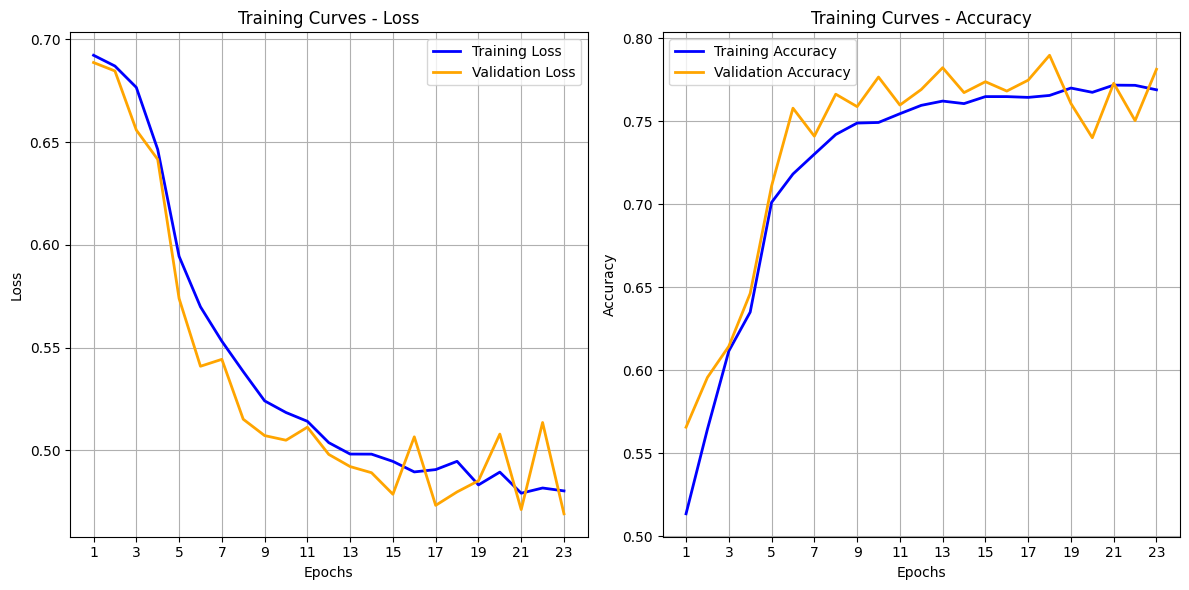

In [108]:
# Set the device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define a parameter grid for random search hyperparameter tuning
param_grid = {
    'hidden_size': [32,64, 128,256,512],                # Range of hidden sizes to explore
    'learning_rate': [1e-2, 1e-3, 1e-4],         # Range of learning rates
    'batch_size': [64, 128, 256],                # Range of batch sizes
    'num_epochs': [100],                         # Number of epochs, fixed at 100 with early stopping implemented
    'dropout': [0.4,0.5, 0.7, 0.9],             # Range of dropout rates
    'num_layers': [1,2,3]                        # Number of RNN layers
}

# Perform random search for 10 trials with specified parameters
best_params, best_val_loss, best_train_history, best_val_history, best_val_accuracy, model, best_train_accuracy = random_search(param_grid, "RNNConcatPooling", num_samples=10, train_embeddings_bool=False)

# Display the best parameters and validation loss from the search
print(f"Best Parameters: {best_params}")
print(f"Best Validation Loss: {best_val_loss:.4f}")

# Plot training and validation loss and accuracy curves for the best model found
plot_loss(best_train_history, best_train_accuracy, best_val_history, best_val_accuracy)


Test Accuracy: 0.76


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:714: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:1410.)
  result = _VF.rnn_tanh(


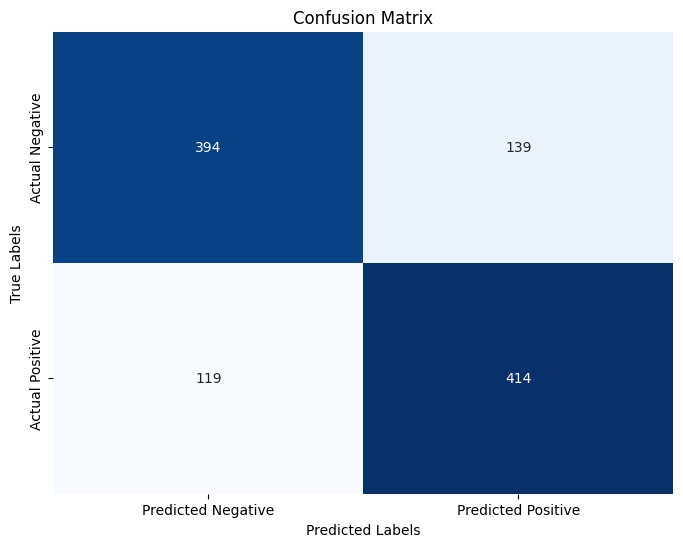

True Positives (TP): 414
True Negatives (TN): 394
False Positives (FP): 139
False Negatives (FN): 119
Accuracy: 0.76
Precision: 0.75
F1 Score: 0.76


0.7579737335834896

In [109]:
# Evaluate the trained model on the test dataset
evaluate_model(model,test_loader)

### Thus, we chose 3 strategies for deriving the final sentence representation to perform sentiment classification. Of them, the first strategy (RNNAveragePooling) performed the best with a test accuracy of 0.7645.




## Question 3


## Question 3.1
## RNN with Trainable Embeddings
We used the RNN without OOV handling for this part of the question. For making the embeddings trainable, we set the train_embeddings_bool parameter to True

Running with fixed parameters: hidden_size=256, lr=0.001, batch_size=128, epochs=100, dropout=0.3, num_layers=2


Epoch 1/100: 100%|██████████| 134/134 [00:03<00:00, 42.31batch/s]


Epoch 1/100 | Train Loss: 0.6720 | Train Accuracy: 0.5756 | Val Loss: 0.5764 | Val Accuracy: 0.7355
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [00:03<00:00, 43.87batch/s]


Epoch 2/100 | Train Loss: 0.4457 | Train Accuracy: 0.8144 | Val Loss: 0.8177 | Val Accuracy: 0.7552
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [00:03<00:00, 44.57batch/s]


Epoch 3/100 | Train Loss: 0.2891 | Train Accuracy: 0.9004 | Val Loss: 0.5473 | Val Accuracy: 0.7523
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [00:03<00:00, 44.60batch/s]


Epoch 4/100 | Train Loss: 0.2860 | Train Accuracy: 0.9052 | Val Loss: 0.5875 | Val Accuracy: 0.7505
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [00:03<00:00, 44.58batch/s]


Epoch 5/100 | Train Loss: 0.1799 | Train Accuracy: 0.9436 | Val Loss: 0.7233 | Val Accuracy: 0.7383
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [00:03<00:00, 44.31batch/s]


Epoch 6/100 | Train Loss: 0.1533 | Train Accuracy: 0.9533 | Val Loss: 0.8027 | Val Accuracy: 0.7505
------------------------------------------------------------


Epoch 7/100: 100%|██████████| 134/134 [00:03<00:00, 44.65batch/s]


Epoch 7/100 | Train Loss: 0.1090 | Train Accuracy: 0.9666 | Val Loss: 1.5138 | Val Accuracy: 0.7458
------------------------------------------------------------
Early stopping...
Fixed Parameters: {'model_type': 'RNNAvgPool', 'hidden_size': 256, 'learning_rate': 0.001, 'batch_size': 128, 'num_epochs': 100, 'dropout': 0.3, 'num_layers': 2, 'train_embeddings_bool': True, 'handle_oov': False}
Best Validation Loss: 0.5473
Best Validation Accuracy: 0.7552
Best Training Accuracy: 0.9666


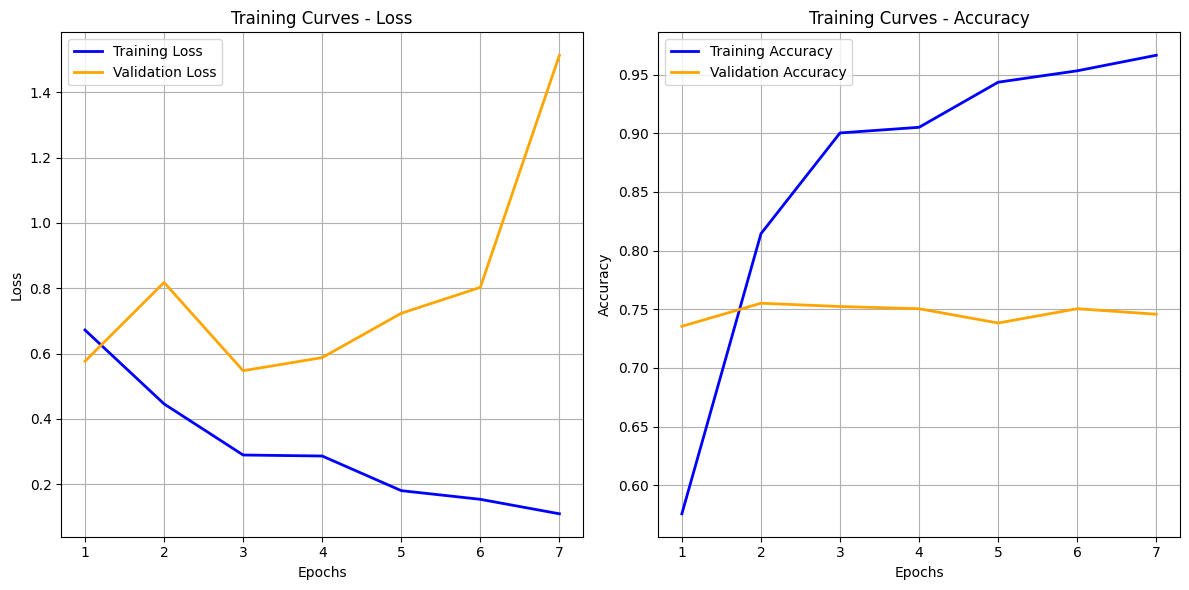

In [35]:
# Set device to GPU if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define a dictionary of fixed hyperparameters for the model
fixed_params = {
    'model_type': 'RNNAvgPool',         # Type of model to use
    'hidden_size': 256,                # Size of hidden layer in the RNN
    'learning_rate': 0.001,             # Learning rate for optimization
    'batch_size': 128,                 # Number of samples per batch
    'num_epochs': 100,                 # Number of training epochs
    'dropout': 0.3,                    # Dropout rate for regularization
    'num_layers': 2,                   # Number of layers in the RNN
    'train_embeddings_bool': True,     # Whether to train the embedding layer
    'handle_oov': False                # Whether to handle out-of-vocabulary tokens
}

# Train model using fixed parameters and capture the best model and results
best_model, results = train_with_fixed_params(**fixed_params)

# Print the fixed parameters used for training
print(f"Fixed Parameters: {fixed_params}")
# Print the best validation loss achieved during training
print(f"Best Validation Loss: {results['best_val_loss']:.4f}")
# Print the best validation accuracy achieved during training
print(f"Best Validation Accuracy: {results['best_val_accuracy']:.4f}")
# Print the best training accuracy achieved during training
print(f"Best Training Accuracy: {results['best_train_accuracy']:.4f}")

# Plot training and validation loss and accuracy over epochs
plot_loss(
    results['train_loss_history'],
    results['train_accuracy_history'],
    results['val_loss_history'],
    results['val_accuracy_history']
)


### Training Results Analysis

The model was trained with the following tuned hyperparameters:
- **Hidden Size**: 256
- **Learning Rate**: 0.001
- **Batch Size**: 128
- **Dropout**: 0.3
- **Number of Layers**: 2

These hyperparameters were chosen through extensive tuning, where other combinations demonstrated performance trade-offs, balancing accuracy and overfitting.

#### Epoch-wise Performance
- **Initial Epochs**: In the first few epochs, there was a sharp decrease in both training and validation loss, indicating effective learning and fast convergence.
- **Best Validation Performance**: The model achieved a best validation loss of 0.5473 and a validation accuracy of 0.7552 in the third epoch.
- **Training Accuracy**: The best training accuracy recorded was 96.66%, showing the model's strong learning capability on the training data.
- **Overfitting Observation**: Starting from around epoch 4, there is a notable divergence between training and validation performance, with validation loss fluctuating and eventually increasing, while training loss continued to decrease. This suggests some degree of overfitting.

#### Early Stopping
Early stopping was triggered to prevent further overfitting, which helped retain the best validation accuracy and loss.

#### Hyperparameter Tuning and Trade-offs
The selected hyperparameters reflect a balance between model complexity and generalization:
- **Higher Dropout Values**: Testing higher dropout (e.g., 0.5) reduced overfitting but led to slower convergence and slightly lower accuracy.
- **Hidden Size and Layer Count**: Increasing the hidden size or adding layers improved training accuracy but worsened validation performance, indicating overfitting.
- **Learning Rate Adjustments**: Higher learning rates caused instability, while lower rates slowed down convergence without significant accuracy gains.



Test Accuracy: 0.78


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:714: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:1410.)
  result = _VF.rnn_tanh(


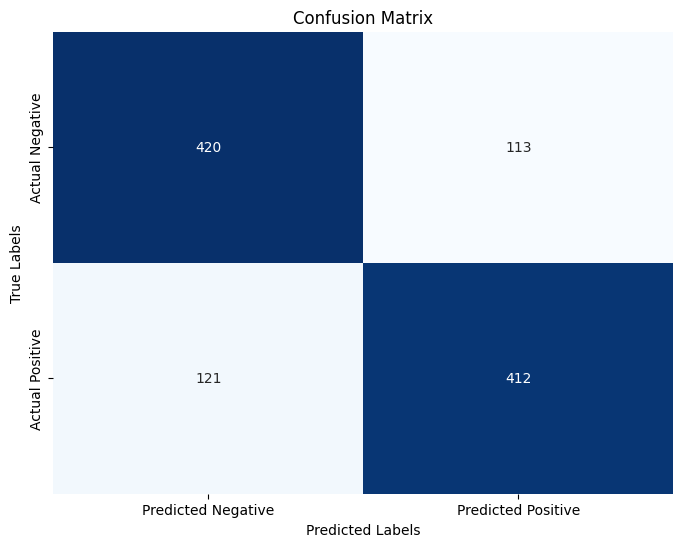

True Positives (TP): 412
True Negatives (TN): 420
False Positives (FP): 113
False Negatives (FN): 121
Accuracy: 0.78
Precision: 0.78
F1 Score: 0.78


0.7804878048780488

In [36]:
# Evaluate the trained model on the test dataset and get performance metrics
evaluate_model(best_model, test_loader)

### Test Results Analysis

#### Model with Trainable Embeddings
- **True Positives (TP)**: 412 – Correctly classified positive samples.
- **True Negatives (TN)**: 420 – Correctly classified negative samples.
- **False Positives (FP)**: 113 – Negative samples incorrectly classified as positive.
- **False Negatives (FN)**: 121 – Positive samples incorrectly classified as negative.
- **Accuracy**: 0.78 – Indicates that 78% of predictions were correct.
- **Precision**: 0.78 – Suggests that when the model predicted a positive, it was correct 78% of the time.
- **F1 Score**: 0.78 – Reflects a good balance between precision and recall, capturing the model’s ability to handle both false positives and false negatives.

#### Model with Non-trainable Embeddings
- **True Positives (TP)**: 411
- **True Negatives (TN)**: 404
- **False Positives (FP)**: 129
- **False Negatives (FN)**: 122
- **Accuracy**: 0.76
- **Precision**: 0.76
- **F1 Score**: 0.77

### Comparison

The first model with trainable embeddings outperformed the second model with non-trainable embeddings, achieving a higher accuracy (0.78 vs. 0.76), precision (0.78 vs. 0.76), and F1 score (0.78 vs. 0.77). This improvement can be attributed to the ability of the trainable embeddings to adapt to the specific dataset and task during training.

**Justification**:
- **Adaptability**: Allowing the embeddings to be trainable enables the model to fine-tune word representations based on the context of the dataset. This adaptability helps capture nuances specific to the sentiment classification task, which static embeddings may miss.
- **Performance Gains**: Trainable embeddings can enhance the model’s ability to generalize by refining the representation of words that may have task-specific meanings, leading to improved performance on both precision and recall.



## Question 3.2
## RNN with Trainable Embeddings and OOV Handling

## Our Approach for Mitigating the Influence of OOV Words

### 1. `SentimentDatasetWithText` Class
The `SentimentDatasetWithText` class serves as a custom dataset handler. This class:
- Stores tokenized text data (`self.texts`) and corresponding sentiment labels (`self.labels`).
- Implements `__len__` and `__getitem__` methods, enabling integration with PyTorch's DataLoader. Each sample retrieved by `__getitem__` is a tuple of preprocessed text and its associated label, which is critical for efficient data batching.

### 2. `create_data_loaders_with_oov_handling` Function
The `create_data_loaders_with_oov_handling` function constructs data loaders with specific OOV handling by:
- Tokenizing, removing punctuation, and filtering stopwords from the texts in each dataset split (train, validation, test). This preprocessing step reduces vocabulary size and mitigates the impact of OOV words by retaining only the most informative tokens.
- Converting each split (train, validation, test) into a `SentimentDatasetWithText` object, which facilitates organized access to text and labels.
- Initializing `DataLoader` instances for each split with a custom collate function, ensuring that each batch is formatted appropriately for model input.

### 3. `collate_fn` Function
The `collate_fn` function customizes batch creation, which is essential for handling variable-length text sequences:
- This function receives a batch of text-label pairs, separates texts and labels, and outputs a list of texts with corresponding label tensors.
- The collate function allows flexibility in token representation.

Together, these components provide a structured pipeline for preparing text data with OOV handling:
- By filtering out less informative words, the model focuses on a more robust vocabulary.
- The collate function, combined with batch processing, ensures that the data is efficiently formatted for downstream model training.
This approach prepares the model to better generalize, even with previously unseen vocabulary.

Note-: In the previous Dataset Class, we were storing indices. However, here we store tokens themselves so that they we can adapt the subwording strategy (introduced in Q1) during model training

In [40]:
from torch.utils.data import DataLoader, Dataset
import torch

# Custom dataset class that takes in text and labels
class SentimentDatasetWithText(Dataset):
    def __init__(self, texts, labels):
        # Initialize dataset with text data and corresponding labels
        self.texts = texts
        self.labels = labels

    def __len__(self):
        # Return the total number of samples
        return len(self.labels)

    def __getitem__(self, idx):
        # Get the text and label at a specific index
        return self.texts[idx], self.labels[idx]

# Function to create data loaders for training, validation, and testing with OOV handling
def create_data_loaders_with_oov_handling(dataset, batch_size):

    # Preprocess texts by tokenizing, removing punctuation, and filtering stopwords for each split
    train_texts = [tokenize_and_remove_punctuation_and_stopwords(text) for text in dataset['train']['text']]
    validation_texts = [tokenize_and_remove_punctuation_and_stopwords(text) for text in dataset['validation']['text']]
    test_texts = [tokenize_and_remove_punctuation_and_stopwords(text) for text in dataset['test']['text']]

    # Create dataset objects for each data split
    train_dataset = SentimentDatasetWithText(train_texts, dataset['train']['label'])
    validation_dataset = SentimentDatasetWithText(validation_texts, dataset['validation']['label'])
    test_dataset = SentimentDatasetWithText(test_texts, dataset['test']['label'])

    # Create DataLoader for each split with specified batch size and custom collate function
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    validation_loader = DataLoader(validation_dataset, batch_size=batch_size, collate_fn=collate_fn)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_fn)

    # Return DataLoaders for training, validation, and testing
    return train_loader, validation_loader, test_loader

# Custom collate function to handle batch creation
def collate_fn(batch):
    # Unpack texts and labels from the batch
    texts, labels = zip(*batch)
    # Return list of texts and tensor of labels
    return list(texts), torch.tensor(labels)


In [41]:
# Create data loaders for training, validation, and test sets with a batch size of 64, applying OOV handling.
train_loader, validation_loader, test_loader = create_data_loaders_with_oov_handling(dataset, 64)

### RNNOOV Model Structure with OOV Handling via Subword Encoding

#### Model Structure
- **Embedding Layer**: The model starts with an embedding layer initialized with pre-trained embeddings, which can be optionally fine-tuned. This layer maps words to dense vector representations. The embedding dimension is inferred directly from the pre-trained embeddings.
- **RNN Layer**: A Recurrent Neural Network (RNN) layer is used to capture sequential dependencies between words in a sentence. The RNN processes each word’s embedding sequentially to produce hidden states.
- **Fully Connected Layer**: After the RNN layer, a fully connected (linear) layer maps the RNN output to the desired output size, typically for classification purposes.

#### Special Focus: OOV (Out-of-Vocabulary) Word Handling
One unique feature of this model is its capability to handle out-of-vocabulary (OOV) words using **subword encoding**. Here’s how it works:

1. **Word Lookup in Pre-trained Embeddings**: For each word in the input sentence, the model first checks if the word exists in the vocabulary of the pre-trained embeddings.
   - If the word exists, its corresponding embedding is retrieved directly from the embedding layer.
   - If the word is **OOV**, the model applies **subword encoding**.

2. **Subword Encoding for OOV Words**:
   - The model splits the OOV word into **subwords** using a method called `get_subwords`. Subwords could be n-grams or smaller units of the word, depending on the implementation of `get_subwords`.
   - For each subword, the model checks if it exists in the pre-trained embedding vocabulary.
   - If subwords are found in the vocabulary, their embeddings are retrieved, and the **average embedding** of these subwords is calculated. This average embedding represents the OOV word as a whole.
   - If no valid subwords are found in the vocabulary, the model returns a **zero vector** as a placeholder for that word.

3. **Batch Preparation**:
   - The embeddings of each word (either from direct lookup or subword averaging) are combined to form a sentence embedding.
   - Sentences in the batch are padded to equal lengths so that they can be processed by the RNN, which requires uniform sequence lengths within a batch.

4. **Sequence Processing and Pooling**:
   - The RNN processes the embeddings of each sentence, producing hidden states for each time step.
   - **Average Pooling** is applied across all hidden states of the RNN to produce a single, fixed-size vector for each sentence, summarizing the information from the entire sequence.

5. **Classification Output**:
   - The pooled sentence representation is passed through the fully connected layer to generate the final classification output.





In [42]:
import torch
import torch.nn as nn

# Define the RNN model with OOV handling using subword encoding and average pooling
class RNNOOV(nn.Module):
    def __init__(self, input_dim, hidden_size, output_size, num_layers, dropout, embeddings, train_embeddings=False, word2vec_model=w2vmodel):
        super(RNNOOV, self).__init__()

        # Initialize embedding layer using pre-trained embeddings with optional training
        self.embeddings = nn.Embedding.from_pretrained(
            torch.tensor(embeddings, dtype=torch.float32), freeze=not train_embeddings, sparse=False
        )
        self.embedding_dim = embeddings.shape[1]  # Get the dimension of the embeddings

        # Define an RNN layer with specified input and hidden sizes
        self.rnn = nn.RNN(input_dim, hidden_size, batch_first=True)

        # Define a fully connected layer to map RNN output to desired output size
        self.fc = nn.Linear(hidden_size, output_size)

        # Create a mapping of words to indices using the pre-trained word embedding model
        self.word_to_index = word2vec_model.key_to_index

    # Method to encode OOV words using subwords
    def encode_with_subwords(self, word, device):
        # Get a list of subwords from the given word
        subwords = get_subwords(word)

        # Find indices of subwords that are in the pre-trained vocabulary
        subword_indices = [
            self.word_to_index[subword]
            for subword in subwords if subword in self.word_to_index
        ]

        # Calculate mean embedding of the subwords if any valid subwords exist
        if subword_indices:
            subword_tensor = torch.tensor(subword_indices, device=device)
            subword_embeddings = self.embeddings(subword_tensor)
            return subword_embeddings.mean(dim=0)  # Return average embedding for OOV word
        else:
            # Return a zero vector if no subwords are found
            return torch.zeros(self.embedding_dim, device=device)

    # Forward pass of the model with average pooling
    def forward(self, x):
        device = next(self.parameters()).device  # Get the device (CPU/GPU) the model is on
        batch_embeddings = []  # Store embeddings for each sentence

        # Process each sentence in the batch
        for sentence in x:
            sentence_embeddings = []  # Store embeddings for each word in the sentence

            # Process each word in the sentence
            for word in sentence:
                # Check if the word is in the vocabulary
                if word in self.word_to_index:
                    word_idx = torch.tensor(self.word_to_index[word], device=device)
                    word_embedding = self.embeddings(word_idx)  # Retrieve embedding
                else:
                    # If OOV, encode using subwords
                    word_embedding = self.encode_with_subwords(word, device)
                sentence_embeddings.append(word_embedding)

            # Stack embeddings for the sentence and add to batch
            sentence_embeddings = torch.stack(sentence_embeddings)
            batch_embeddings.append(sentence_embeddings)

        # Pad sentences in the batch to equal lengths for RNN processing
        batch_embeddings = torch.nn.utils.rnn.pad_sequence(batch_embeddings, batch_first=True)

        # Pass padded embeddings through the RNN
        rnn_out, _ = self.rnn(batch_embeddings)

        # Apply average pooling across all time steps
        final_output = torch.mean(rnn_out, dim=1)  # Average pooling over the sequence length dimension

        # Pass through fully connected layer to get final output
        return self.fc(final_output)


Running with fixed parameters: hidden_size=128, lr=0.001, batch_size=128, epochs=100, dropout=0.5, num_layers=1


Epoch 1/100: 100%|██████████| 134/134 [05:31<00:00,  2.48s/batch]


Epoch 1/100 | Train Loss: 0.5800 | Train Accuracy: 0.7035 | Val Loss: 0.4840 | Val Accuracy: 0.7645
------------------------------------------------------------


Epoch 2/100: 100%|██████████| 134/134 [05:31<00:00,  2.48s/batch]


Epoch 2/100 | Train Loss: 0.2824 | Train Accuracy: 0.8873 | Val Loss: 0.5318 | Val Accuracy: 0.7627
------------------------------------------------------------


Epoch 3/100: 100%|██████████| 134/134 [05:31<00:00,  2.48s/batch]


Epoch 3/100 | Train Loss: 0.1358 | Train Accuracy: 0.9544 | Val Loss: 0.9939 | Val Accuracy: 0.7420
------------------------------------------------------------


Epoch 4/100: 100%|██████████| 134/134 [05:31<00:00,  2.48s/batch]


Epoch 4/100 | Train Loss: 0.0873 | Train Accuracy: 0.9756 | Val Loss: 0.8949 | Val Accuracy: 0.7402
------------------------------------------------------------


Epoch 5/100: 100%|██████████| 134/134 [05:31<00:00,  2.48s/batch]


Epoch 5/100 | Train Loss: 0.0558 | Train Accuracy: 0.9859 | Val Loss: 0.9085 | Val Accuracy: 0.7411
------------------------------------------------------------


Epoch 6/100: 100%|██████████| 134/134 [05:31<00:00,  2.48s/batch]


Epoch 6/100 | Train Loss: 0.0493 | Train Accuracy: 0.9857 | Val Loss: 1.0040 | Val Accuracy: 0.7270
------------------------------------------------------------
Early stopping...
Fixed Parameters: {'model_type': 'RNNOOV', 'hidden_size': 128, 'learning_rate': 0.001, 'batch_size': 128, 'num_epochs': 100, 'dropout': 0.5, 'num_layers': 1, 'train_embeddings_bool': True, 'handle_oov': True}
Best Validation Loss: 0.4840
Best Validation Accuracy: 0.7645
Best Training Accuracy: 0.9859


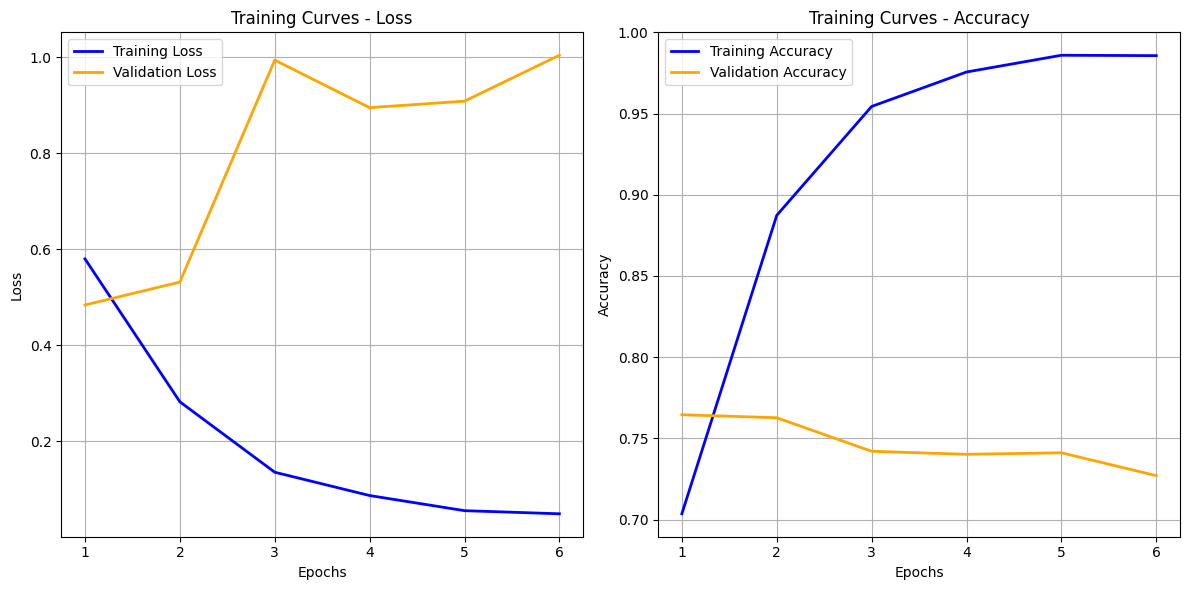

In [43]:
# Set the device to GPU if available; otherwise, use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define a dictionary of fixed hyperparameters for the model
fixed_params = {
    'model_type': 'RNNOOV',            # Specify model type as RNNOOV to handle OOV words with subwords
    'hidden_size': 128,                # Set the hidden layer size for the RNN
    'learning_rate': 1e-3,             # Set the learning rate for the optimizer
    'batch_size': 128,                 # Define the batch size for training
    'num_epochs': 100,                 # Set the number of training epochs
    'dropout': 0.5,                    # Set the dropout rate for regularization
    'num_layers': 1,                   # Define the number of RNN layers
    'train_embeddings_bool': True,     # Enable training of embeddings (non-frozen)
    'handle_oov': True                 # Enable OOV handling using subwords
}

# Train the model with the defined parameters and capture the best model and training results
best_model, results = train_with_fixed_params(**fixed_params)

# Print the fixed parameters used for training
print(f"Fixed Parameters: {fixed_params}")
# Print the best validation loss achieved during training
print(f"Best Validation Loss: {results['best_val_loss']:.4f}")
# Print the best validation accuracy achieved during training
print(f"Best Validation Accuracy: {results['best_val_accuracy']:.4f}")
# Print the best training accuracy achieved during training
print(f"Best Training Accuracy: {results['best_train_accuracy']:.4f}")

# Plot training and validation loss and accuracy history over epochs
plot_loss(
    results['train_loss_history'],
    results['train_accuracy_history'],
    results['val_loss_history'],
    results['val_accuracy_history']
)


### Training Results Analysis

The model was trained with the following tuned hyperparameters:
- **Hidden Size**: 128
- **Learning Rate**: 0.001
- **Batch Size**: 128
- **Dropout**: 0.5
- **Number of Layers**: 1

These hyperparameters were selected after multiple tuning experiments, where other combinations presented trade-offs in terms of accuracy, convergence speed, and generalization.

#### Epoch-wise Performance
- **Initial Epochs**: During the first two epochs, the training and validation loss decreased significantly, showing effective learning and a strong start in convergence.
- **Training Accuracy**: Reached a peak of 98.59% by the sixth epoch, indicating that the model learned well on the training data.
- **Validation Performance**: The best validation loss achieved was 0.4840 with a validation accuracy of 76.45%. After this point, validation loss began to increase, indicating signs of overfitting.
- **Divergence**: From epoch 3 onwards, validation accuracy started to decline while training accuracy continued to rise, suggesting overfitting.

#### Early Stopping
Early stopping was applied after six epochs, which helped in preserving the best validation performance without further overfitting.

#### Hyperparameter Tuning and Trade-offs
The chosen hyperparameters represent a balanced trade-off:
- **Dropout Rate**: A higher dropout rate of 0.5 was used to mitigate overfitting; however, further increasing dropout led to slower learning and reduced accuracy.
- **Layer Count and Hidden Size**: Increasing the number of layers or hidden size slightly improved training accuracy but worsened validation accuracy, indicating a risk of overfitting.
- **Learning Rate Adjustments**: Higher learning rates caused instability in convergence, while lower rates slowed down training without significant gains in performance.


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:714: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:1410.)
  result = _VF.rnn_tanh(


Test Accuracy: 0.79


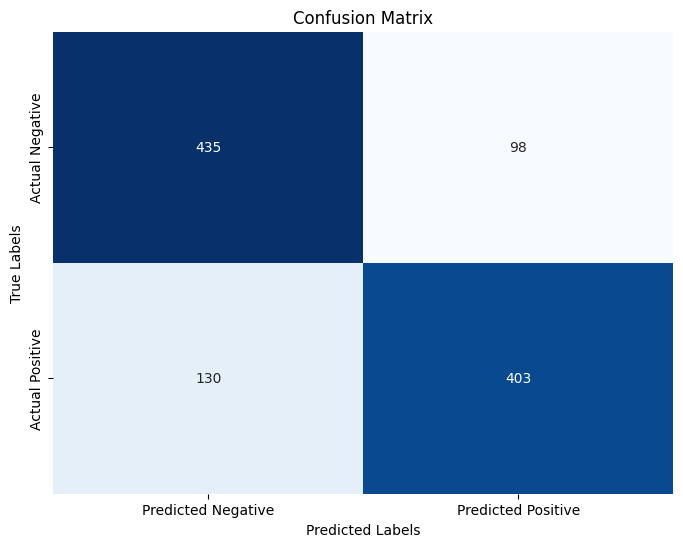

True Positives (TP): 403
True Negatives (TN): 435
False Positives (FP): 98
False Negatives (FN): 130
Accuracy: 0.79
Precision: 0.80
F1 Score: 0.78


0.7861163227016885

In [44]:
# Evaluate the trained model on the test dataset with OOV handling enabled
evaluate_model(best_model, test_loader, True)

### Test Results Analysis and Comparison


#### Model 1: Trainable Embeddings with OOV Handling
- **True Positives (TP)**: 403
- **True Negatives (TN)**: 435
- **False Positives (FP)**: 98
- **False Negatives (FN)**: 130
- **Accuracy**: 0.79
- **Precision**: 0.80
- **F1 Score**: 0.78

#### Model 2: Trainable Embeddings without OOV Handling
- **True Positives (TP)**: 412
- **True Negatives (TN)**: 420
- **False Positives (FP)**: 113
- **False Negatives (FN)**: 121
- **Accuracy**: 0.78
- **Precision**: 0.78
- **F1 Score**: 0.78

#### Model 3: Non-trainable Embeddings without OOV Handling
- **True Positives (TP)**: 411
- **True Negatives (TN)**: 404
- **False Positives (FP)**: 129
- **False Negatives (FN)**: 122
- **Accuracy**: 0.76
- **Precision**: 0.76
- **F1 Score**: 0.77

### Comparative Analysis

1. **Model 1 vs Model 2**:
   - **Improvement with OOV Handling**: Model 1, which includes OOV handling, achieved slightly higher accuracy (0.79) and precision (0.80) compared to Model 2 (accuracy of 0.78, precision of 0.78).
   - **Justification**: The OOV handling mechanism in Model 1 allows it to generate meaningful embeddings for unknown words by using subword representations. This likely helped reduce misclassifications when encountering words outside the initial vocabulary, enhancing generalization and improving performance metrics.

2. **Model 2 vs Model 3**:
   - **Improvement with Trainable Embeddings**: Model 2, which has trainable embeddings, outperformed Model 3 in all metrics, with an accuracy of 0.78 vs. 0.76 and an F1 score of 0.78 vs. 0.77.
   - **Justification**: Trainable embeddings allow the model to adjust word representations based on task-specific context. Model 2’s ability to adapt embeddings during training helped it better capture semantic nuances, resulting in higher accuracy and a lower rate of misclassification.

3. **Model 1 vs Model 3**:
   - **Combined Impact of Trainable Embeddings and OOV Handling**: Model 1 shows the highest performance across all metrics, with a 3% improvement in accuracy (0.79 vs. 0.76) over Model 3. The inclusion of both trainable embeddings and OOV handling provides a substantial advantage.
   - **Justification**: The combination of trainable embeddings and OOV handling enhances the model’s robustness. Trainable embeddings adjust to the dataset's specific vocabulary, while OOV handling reduces the negative impact of unknown words. This allows Model 1 to achieve the highest overall performance.

Overall, **Model 1** demonstrates the strongest generalization and classification accuracy due to its comprehensive approach to handling vocabulary variations and unknown words.
